#### Importing the key libraries

In [97]:
import warnings
warnings.filterwarnings("ignore")

In [98]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)

#### Importing the data from the CSV files

In [99]:
application_data = pd.read_csv("application_data.csv")

In [100]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
## getting the current shape & information abt the data frame

In [102]:
application_data.shape

(307511, 122)

In [101]:
application_data.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

## Dealing with missing values. Finding the % for each column.

In [103]:
missing_data = (100* application_data.isnull().sum()/application_data.shape[0]).reset_index()

In [104]:
missing_data.rename(columns = {"index":"column_name",0:"% missing"},inplace = True)

In [10]:
## now finding the columns which have 40% or more missing values

In [105]:
drop_list = missing_data[missing_data["% missing"]>=40].column_name.tolist()

In [106]:
drop_list

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

### Now drop these columns which have 40% or more missing values

In [107]:
application_data.drop(drop_list,axis =1,inplace = True)

In [14]:
# now get the new shape of the application_data

In [108]:
application_data.shape

(307511, 73)

### Checking the other columns with missing data i.e. columns with missing >0 and missing <40; since we had already dropped the columns with more than 40% missing data

In [109]:
missing_data = missing_data[(missing_data['% missing']<40) & (missing_data['% missing']>0)]

## Checking Occupation Type

In [17]:
## setting the missing data for occupation as "others".

## first , converting occupation type to string

In [53]:
#application_data.OCCUPATION_TYPE = application_data.OCCUPATION_TYPE.astype("string")

In [110]:
application_data.OCCUPATION_TYPE.fillna("OTHERS", inplace = True)

In [111]:
application_data.OCCUPATION_TYPE.value_counts(normalize = True)

OTHERS                   0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64

## Checking Column " External Source 3"
Almost 19% of data is missing for this external source 3. This seems like a score data that has been retrieved from external source. Better to impute it with a NaN value. We cannot use the mode or median to replace the value ; as it could lead to skewed analysis. At this stage, not sure if this score is important or not.

In [112]:
application_data.EXT_SOURCE_3.fillna(np.NaN, inplace = True)

In [113]:
application_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [114]:
missing_data

column_name  % missing
9                   AMT_ANNUITY   0.003902
10              AMT_GOODS_PRICE   0.090403
11              NAME_TYPE_SUITE   0.420148
28              OCCUPATION_TYPE  31.345545
29              CNT_FAM_MEMBERS   0.000650
42                 EXT_SOURCE_2   0.214626
43                 EXT_SOURCE_3  19.825307
91     OBS_30_CNT_SOCIAL_CIRCLE   0.332021
92     DEF_30_CNT_SOCIAL_CIRCLE   0.332021
93     OBS_60_CNT_SOCIAL_CIRCLE   0.332021
94     DEF_60_CNT_SOCIAL_CIRCLE   0.332021
95       DAYS_LAST_PHONE_CHANGE   0.000325
116  AMT_REQ_CREDIT_BUREAU_HOUR  13.501631
117   AMT_REQ_CREDIT_BUREAU_DAY  13.501631
118  AMT_REQ_CREDIT_BUREAU_WEEK  13.501631
119   AMT_REQ_CREDIT_BUREAU_MON  13.501631
120   AMT_REQ_CREDIT_BUREAU_QRT  13.501631
121  AMT_REQ_CREDIT_BUREAU_YEAR  13.501631

In [115]:
# Checking other columns for missing data.
# AMT_ANNUITY
application_data.AMT_ANNUITY.value_counts()

#AMT_ANNUITY has around 12 rows where the data is missing. Better to drop as the % is quite less. or 0.004%

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
15210.0       1
50265.0       1
73012.5       1
40558.5       1
4437.0        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [116]:
# Dropping the records where AMT_ANNUITY is NaN. Only 12 records. 

application_data = application_data[~application_data.AMT_ANNUITY.isnull()]

In [26]:
#NAME_TYPE_SUITE has around 1292 rows where the data is missing.Since the % is only 0.4%, we can consider replacing by
# mode or the most common value or we could choose to drop the records. 

In [117]:
# getting the most common value for Name_Type_Suite - i.e. who was accompanying the person
application_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248515
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [118]:
application_data.NAME_TYPE_SUITE = application_data.NAME_TYPE_SUITE.astype("string")

In [119]:
application_data.NAME_TYPE_SUITE.describe().top

'Unaccompanied'

In [120]:
application_data.NAME_TYPE_SUITE.fillna(application_data.NAME_TYPE_SUITE.describe().top, inplace = True)

In [121]:
application_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

### Checking the OBS_30,DEF_30 columns - total 4 columns

##### Around 0.33 % in these columns have null values

In [122]:
type(application_data.OBS_30_CNT_SOCIAL_CIRCLE[68])

numpy.float64

In [123]:
application_data.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306478.000000
mean          1.422291
std           2.401023
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [124]:
# we can fill with np.NaN to make sure that the data doesnt affect our analysis

application_data.OBS_30_CNT_SOCIAL_CIRCLE.fillna(np.NaN, inplace = True)
application_data.OBS_60_CNT_SOCIAL_CIRCLE.fillna(np.NaN, inplace = True)
application_data.DEF_30_CNT_SOCIAL_CIRCLE.fillna(np.NaN, inplace = True)
application_data.DEF_30_CNT_SOCIAL_CIRCLE.fillna(np.NaN, inplace = True)

### Checking the Goods Price Column
The null values seem reasonable as it could be for cases where it is not a consumer loan. We can choose to drop them or keep them. It wont affect the analysis

In [130]:
application_data[application_data.AMT_GOODS_PRICE.isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724         100837       0    Revolving loans           F            N   
5937        106955       0    Revolving loans           F            N   
6425        107494       0    Revolving loans           F            N   
6703        107822       0    Revolving loans           F            N   
7647        108913       0    Revolving loans           M            N   
7880        109190       1    Revolving loans           F            N   
7995        109322       0    Revolving loans           M            N   
10819       112595       0    Revolving loans           F            N   
11287       113148       0    Revolving loans           F            N   
13008       115162       0    Revolving loans           F            N   
14699       117150       0    Revolving loans           M            N   
15953       118618       0    Revolving loans           F            N   
18935       122080       0    Revolving loans           M            N   
19178       122374       0    Revolving loans           F            N   
19921       123233       0    Revolving loans           F            N   
21193       124697       0    Revolving loans           F            N   
21338       124859       0    Revolving loans           M            N   
21546       125096       0    Revolving loans           F            N   
25391       129532       0    Revolving loans           M            N   
26398       130692       0    Revolving loans           M            N   
26736       131077       0    Revolving loans           F            N   
27003       131385       0    Revolving loans           M            N   
28201       132778       0    Revolving loans           F            N   
29059       133761       0    Revolving loans           F            N   
30164       135010       0    Revolving loans           F            N   
30294       135159       0    Revolving loans           M            N   
32143       137268       0    Revolving loans           M            N   
36250       141975       0    Revolving loans           F            N   
36721       142532       0    Revolving loans           M            N   
39230       145435       0    Revolving loans           F            N   
40571       146988       0    Revolving loans           F            N   
41099       147593       1    Revolving loans           F            N   
41161       147655       0    Revolving loans           M            N   
41982       148605       0    Revolving loans           M            N   
42024       148658       0    Revolving loans           F            N   
43630       150507       0    Revolving loans           M            N   
45657       152889       0    Revolving loans           M            N   
47627       155169       0    Revolving loans           F            N   
50540       158525       1    Revolving loans           F            N   
52711       161052       0    Revolving loans           M            N   
52955       161332       0    Revolving loans           F            N   
54045       162615       0    Revolving loans           F            N   
55600       164423       0    Revolving loans           F            N   
56002       164897       1    Revolving loans           F            N   
58595       167920       0    Revolving loans           F            N   
58653       167989       0    Revolving loans           M            N   
60622       170291       0    Revolving loans           M            N   
61022       170764       0    Revolving loans           F            N   
61072       170823       0    Revolving loans           F            N   
61618       171462       0    Revolving loans           M            N   
63319       173434       0    Revolving loans           F            N   
64118       174350       0    Revolving loans           F            N   
64184       174427       0    Revolving loans           F            N   
66168       

In [562]:
## Checking for outliers
## Most of the goods price seems to lie between 2.4 to 6.8 Lakhs

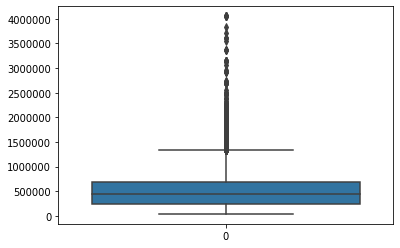

In [564]:
sns.boxplot(application_data.AMT_GOODS_PRICE)

In [565]:
application_data.AMT_GOODS_PRICE.describe()

count    3.072210e+05
mean     5.383973e+05
std      3.694484e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [131]:
application_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278220
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

### Checking the AMT_REQ_CREDIT_BUREAU columns - total 6 in number

There are some records where no credit enquiry was done for the loan applicant. This is realistically possible as the applicant might be availing loan for the first time or no loan/credit requests in the past 1 year. So, I have decided to retain them

In [146]:
application_data[application_data.AMT_REQ_CREDIT_BUREAU_MON.isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
3           100006       0         Cash loans           F            N   
9           100012       0    Revolving loans           M            N   
14          100018       0         Cash loans           F            N   
17          100021       0    Revolving loans           F            N   
20          100024       0    Revolving loans           M            Y   
...            ...     ...                ...         ...          ...   
307484      456228       0         Cash loans           F            Y   
307501      456245       0         Cash loans           F            N   
307504      456248       0         Cash loans           F            N   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
3                    Y             0          135000.0    312682.5   
9                    Y             0          135000.0    405000.0   
14                   Y             0          189000.0    773680.5   
17                   Y             1           81000.0    270000.0   
20                   Y             0          135000.0    427500.0   
...                ...           ...               ...         ...   
307484               N             0          540000.0    545040.0   
307501               Y             3           81000.0    269550.0   
307504               Y             0          153000.0    331920.0   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
3           29686.5         297000.0   Unaccompanied               Working   
9           20250.0         405000.0   Unaccompanied               Working   
14          32778.0         679500.0   Unaccompanied               Working   
17          13500.0         270000.0   Unaccompanied               Working   
20          21375.0         427500.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307484      35617.5         450000.0   Unaccompanied  Commercial associate   
307501      11871.0         225000.0   Unaccompanied  Commercial associate   
307504      16096.5         225000.0   Unaccompanied               Working   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
3       Secondary / secondary special        Civil marriage   
9       Secondary / secondary special  Single / not married   
14      Secondary / secondary special               Married   
17      Secondary / secondary special               Married   
20      Secondary / secondary special               Married   
...                               ...                   ...   
307484  Secondary / secondary special               Married   
307501  Secondary / secondary special               Married   
307504  Secondary / secondary special             Separated   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
3       House / apartment                    0.008019      -19005   
9       House / apartment                    0.019689      -14469   
14      House / apartment                    0.010006      -14583   
17      House / apartment                    0.010966       -9776   
20      House / apartment                    0.015221      -18252   
...                   ...                         ...         ...   
307484   Rented apartment                    0.032561      -12847   
307501  House / apartment       

### Checking for outliers in the Data.  Check if there is scope for cleansing the data

In [147]:
application_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 string
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [148]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [149]:
# check the data types for DAYS_BIRTH. This seems to be negative and not in the right format. Better to convert into yrs.
application_data.DAYS_BIRTH = application_data.DAYS_BIRTH.apply(lambda x:abs(x))


In [150]:
application_data.DAYS_BIRTH.describe()

count    307499.000000
mean      16037.054212
std        4364.000425
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [151]:
# Adding a new column to represent AGE_BIRTH
application_data["YEARS_BIRTH"] = application_data.DAYS_BIRTH.apply(lambda x:abs(x)/365)

In [152]:
# Age seems to be ok. The data seems to make sense

application_data.YEARS_BIRTH.value_counts()

37.668493    43
36.934247    42
27.452055    41
49.994521    41
43.208219    40
             ..
68.624658     1
68.109589     1
68.115068     1
68.764384     1
68.273973     1
Name: YEARS_BIRTH, Length: 17460, dtype: int64

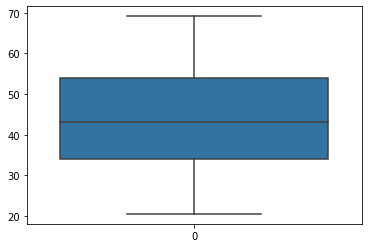

In [448]:
# Age seems to be ok. The data seems to make sense. Checking for outliers. No outliers in this dataset.
sns.boxplot(application_data.YEARS_BIRTH)

In [498]:
application_data.YEARS_BIRTH.value_counts()

37.668493    43
36.934247    42
27.452055    41
49.994521    41
43.208219    40
             ..
68.624658     1
68.109589     1
68.115068     1
68.764384     1
68.273973     1
Name: YEARS_BIRTH, Length: 17460, dtype: int64

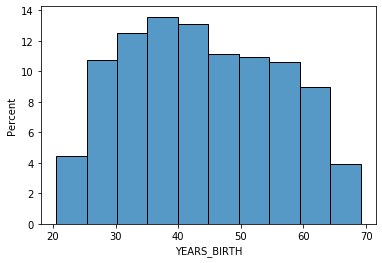

In [500]:
sns.histplot(application_data.YEARS_BIRTH,bins=10,stat = "percent")

In [154]:
# check the data types for DAYS_EMPLOYED ( No of days before the client started his current application)
#. This seems to be negative and not in the right format. Better to convert into yrs. Also, there is a number 365243 which is appearing 55374 times.
#Need to verify this. 

application_data.DAYS_EMPLOYED.value_counts()

 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-11115         1
-11371         1
-11883         1
-13536         1
-8795          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [449]:
# Checkinf for outliers in Days_Employed

Text(0.5, 1.0, 'DAYS_EMPLOYED')

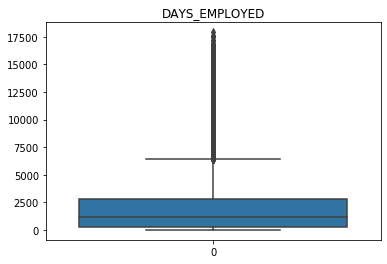

In [744]:
sns.boxplot(application_data.DAYS_EMPLOYED)
plt.title("DAYS_EMPLOYED")

In [ ]:
application

In [155]:
# This 365243 number seems to be used for pensioners or unemployed people. This seems like an outlier. We can bin them or cap them
application_data[application_data.DAYS_EMPLOYED ==365243].NAME_INCOME_TYPE.value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

In [156]:
application_data.DAYS_EMPLOYED = application_data.DAYS_EMPLOYED.apply(lambda x:abs(x))

In [157]:
application_data.DAYS_EMPLOYED.value_counts()

365243    55374
200         156
224         152
230         151
199         151
          ...  
14832         1
14719         1
13344         1
11494         1
10893         1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [158]:
application_data["YEARS_EMPLOYED"] = application_data.DAYS_EMPLOYED.apply(lambda x:x/365)

In [159]:
application_data.YEARS_EMPLOYED.value_counts()

1000.665753    55374
0.547945         156
0.613699         152
0.630137         151
0.545205         151
               ...  
27.465753          1
38.758904          1
32.326027          1
32.400000          1
30.619178          1
Name: YEARS_EMPLOYED, Length: 12574, dtype: int64

In [160]:
# This 1000+ number seems to be used for pensioners or unemployed people. This seems like an outlier. We can replace it with something
# more realistic like 50 and above. we can leave it for the time being. 

temp = application_data[~(application_data.DAYS_EMPLOYED == 365243)]

In [161]:
# without the outliers, the max is around 50 years. So, its better to impute records with DAys employed == 354243
temp.YEARS_EMPLOYED.describe()

count    252125.000000
mean          6.531988
std           6.406580
min           0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: YEARS_EMPLOYED, dtype: float64

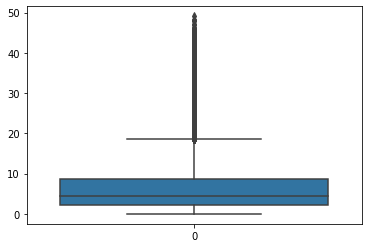

In [451]:
sns.boxplot(temp.YEARS_EMPLOYED)

In [ ]:
## Maybe it is better to use some binning for representing pensioners - Years of employment, 50 &  above years for considering these outliers 

In [472]:
application_data[application_data.NAME_INCOME_TYPE =="Pensioner"].YEARS_EMPLOYED.value_counts()

1000.665753    55352
35.246575          1
4.572603           1
5.191781           1
14.002740          1
6.413699           1
8.934247           1
3.687671           1
22.301370          1
30.668493          1
4.482192           1
Name: YEARS_EMPLOYED, dtype: int64

In [474]:
application_data[application_data.NAME_INCOME_TYPE =="Unemployed"].DAYS_EMPLOYED.value_counts()

365243    22
Name: DAYS_EMPLOYED, dtype: int64

In [ ]:
### For pensioners and unemployed people, we can replace the DAYS_EMPLOYED and YEARS_EMPLOYED by 0. As they are not currently employed.

In [478]:
application_data.DAYS_EMPLOYED.replace(to_replace=365243,value=0,inplace=True)
application_data["YEARS_EMPLOYED"] = application_data.DAYS_EMPLOYED.apply(lambda x:x/365)

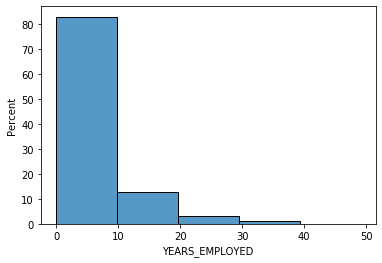

In [502]:
sns.histplot(application_data.YEARS_EMPLOYED,bins=5,stat ="percent")

In [166]:
## Converting all the Days related columns to absolute values
application_data.DAYS_ID_PUBLISH.value_counts()
application_data.DAYS_ID_PUBLISH = application_data.DAYS_ID_PUBLISH.apply(lambda x:abs(x))

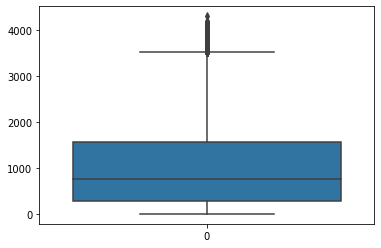

In [452]:
application_data.DAYS_LAST_PHONE_CHANGE.value_counts()
application_data.DAYS_LAST_PHONE_CHANGE = application_data.DAYS_LAST_PHONE_CHANGE.apply(lambda x:abs(x))



In [454]:
application_data.DAYS_LAST_PHONE_CHANGE.describe()

count    307498.000000
mean        962.862113
std         826.809159
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

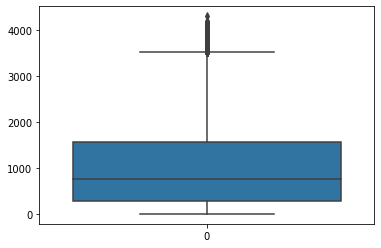

In [455]:
sns.boxplot(application_data.DAYS_LAST_PHONE_CHANGE)


In [170]:
 application_data.DAYS_REGISTRATION.value_counts()
application_data.DAYS_REGISTRATION = application_data.DAYS_REGISTRATION.apply(lambda x:abs(x))

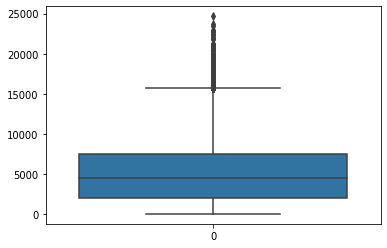

In [456]:
sns.boxplot(application_data.DAYS_REGISTRATION)


In [459]:
application_data[application_data.DAYS_REGISTRATION == 24672]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
234093      371157       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
234093               Y             0           90000.0    239850.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
234093      23494.5         225000.0          Family        Pensioner   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
234093  Secondary / secondary special            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
234093                     0.00712       24790         365243   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
234093            24672.0             4202           1               0   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
234093                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
234093          OTHERS              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
234093                            2                   SATURDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
234093                       13                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
234093                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
234093                       0                       0   

        LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
234093                        0               XNA      0.245362      0.681706   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
234093                       6.0                       1.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
234093                       6.0                       1.0   

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
234093                  1334.0                0                0   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
234093                0                0                1                0   

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
234093                0                0                 0                 0   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
234093                 0                 0                 0   

        FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
234093                 0                 0                 0   

        FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
234093                 0                 0                 0   

        FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
234093                 0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
234093                        0.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
234093                        1.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_YEAR  YEARS_BIRTH  YEARS_EMPLOYED  
234093                         2.0    67.917808     1000.665753

In [467]:

application_data[~(application_data.DAYS_EMPLOYED == 365243)].DAYS_EMPLOYED.describe()

count    252125.000000
mean       2384.175794
std        2338.401661
min           0.000000
25%         767.000000
50%        1648.000000
75%        3175.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
## Checking the AMT_INCOME columns. For income ,there seems to be an outlier. Some salaries are too high

In [482]:
application_data.AMT_INCOME_TOTAL.describe()

count    3.074990e+05
mean     1.687972e+05
std      2.371274e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.469970e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

Text(0.5, 1.0, 'AMT_INCOME_TOTAL')

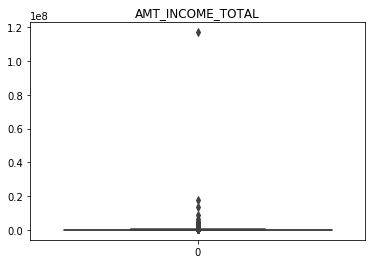

In [743]:
sns.boxplot(application_data.AMT_INCOME_TOTAL)
plt.title("AMT_INCOME_TOTAL")

In [494]:
bins = [0,1e5,2e5,3e5,4e5,5e5,6e5,7e5,8e5,9e5,10e5,15e5]
labels = ["0-100K","100-200K","200-300K","300-400K","400-500K","500-600K","600-700K","700-800K","800-900K","900K-1M","1M & "]
application_data['salary_range'] = pd.cut(application_data.AMT_INCOME_TOTAL,bins=bins, labels =labels)

In [497]:
application_data.salary_range.value_counts(normalize = True)*100

100-200K    50.710928
200-300K    21.200332
0-100K      20.719874
300-400K     4.773352
400-500K     1.743897
500-600K     0.356196
600-700K     0.282680
800-900K     0.096937
1M &         0.053999
700-800K     0.052697
900K-1M      0.009108
Name: salary_range, dtype: float64

In [ ]:
## Checking the AMT_CREDIT columns. 

In [504]:
application_data.AMT_CREDIT.describe()

count    3.074990e+05
mean     5.990273e+05
std      4.024927e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

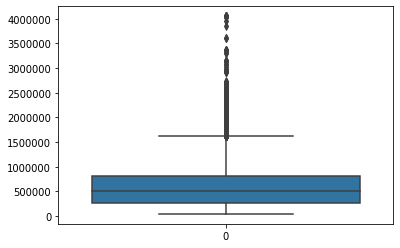

In [505]:
## there are some outliers in the loan credit amounts. However, this seems normal as we could have high value loans as well
sns.boxplot(application_data.AMT_CREDIT)

In [506]:
bins = [0,1e5,2e5,3e5,4e5,5e5,6e5,7e5,8e5,9e5,10e5,15e5]
labels = ["0-100K","100-200K","200-300K","300-400K","400-500K","500-600K","600-700K","700-800K","800-900K","900K-1M","1M & "]
application_data['loan_range'] = pd.cut(application_data.AMT_CREDIT,bins=bins, labels =labels)

In [520]:

# Now, lets check the distribution of these loans
application_data.loan_range.value_counts(normalize = True)*100

200-300K    18.470865
1M &        13.219520
500-600K    11.535571
400-500K    10.795537
100-200K    10.156600
300-400K     8.875357
600-700K     8.103982
800-900K     7.343728
700-800K     6.467549
900K-1M      3.007990
0-100K       2.023300
Name: loan_range, dtype: float64

In [521]:
## Now lets check the annuity column

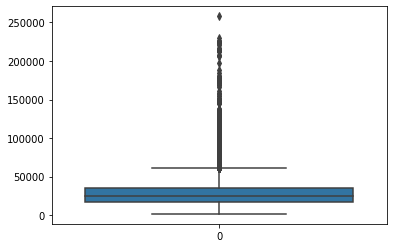

In [522]:
sns.boxplot(application_data.AMT_ANNUITY)

In [543]:
application_data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [740]:
## Checking the gender column
application_data.CODE_GENDER.value_counts()

F      202440
M      105055
XNA         4
Name: CODE_GENDER, dtype: int64

In [ ]:
## Checking the XNA records. Kept it for the time being.

In [742]:
application_data[application_data.CODE_GENDER =="XNA"]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                Y             0          207000.0    382500.0   
38566                Y             2          157500.0    270000.0   
83382                Y             1          135000.0    405000.0   
189640               Y             0          247500.0    540000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657       19125.0         337500.0   Unaccompanied               Working   
38566       13500.0         225000.0          Family               Working   
83382       20250.0         225000.0   Unaccompanied               Working   
189640      27000.0         900000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                     0.020713       20232          10044   
38566                     0.026392       13717           2797   
83382                     0.035792       10647           1228   
189640                    0.035792        9649           2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
35657             10024.0             3537           1               1   
38566              2241.0             4659           1               1   
83382               183.0             1671           1               1   
189640             4099.0             2326           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
35657                 1                 1           1           0   
38566                 1                 1           1           0   
83382                 1                 1           1           0   
189640                1                 1           1           0   

           OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657               OTHERS              2.0                     3   
38566   Low-skill Laborers              4.0                     2   
83382           Core staff              3.0                     2   
189640              OTHERS              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
35657                        0                       0   
3

## Creating a new variable - Credit to Income ratio for better analysis

In [557]:
application_data['CREDIT_INCOME_RATIO'] = application_data.AMT_CREDIT/application_data.AMT_INCOME_TOTAL
bins = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,90]
labels = ["0-0.5","0.5-1","1-1.5","1.5-2","2-2.5","2.5-3","3-3.5","3.5-4","4-4.5","4.5-5","5 & Above"]
application_data['CREDIT_INCOME_RATIO_RANGE'] = pd.cut(application_data.CREDIT_INCOME_RATIO,bins=bins, labels =labels)


In [558]:
application_data.CREDIT_INCOME_RATIO_RANGE.value_counts()

5 & Above    80806
1.5-2        34226
2.5-3        32853
2-2.5        32002
1-1.5        25933
3-3.5        25780
3.5-4        22923
4-4.5        18438
4.5-5        18364
0.5-1        14311
0-0.5         1863
Name: CREDIT_INCOME_RATIO_RANGE, dtype: int64

In [597]:
application_data['ANNUITY_INCOME_RATIO'] = application_data.AMT_ANNUITY/application_data.AMT_INCOME_TOTAL


In [598]:
application_data.ANNUITY_INCOME_RATIO.describe()

count    307499.000000
mean          0.180930
std           0.094574
min           0.000224
25%           0.114782
50%           0.162833
75%           0.229067
max           1.875965
Name: ANNUITY_INCOME_RATIO, dtype: float64

## Data Imbalance

In [515]:
# Checking if there is data imbalance
application_data.TARGET.value_counts(normalize = True)*100

0    91.926803
1     8.073197
Name: TARGET, dtype: float64

Text(0.5, 1.0, 'Data Imbalance based on Target Variable')

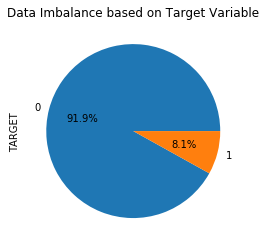

In [519]:
application_data.TARGET.value_counts(normalize = True).plot.pie(autopct ="%1.1f%%")
plt.title("Data Imbalance based on Target Variable")

### Segmented Univariate Analysis
### Dividing the data into 2 datasets or 2 segments
0. All Other Cases
1. Clients with payment difficulties

In [600]:
# All other cases
app_data_0 = application_data[application_data.TARGET ==0]

# clients with payment difficulties
app_data_1 = application_data[application_data.TARGET ==1]


In [176]:
### Lets compare the age


application_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 string
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

[Text(0, 0.5, '% of Clients')]

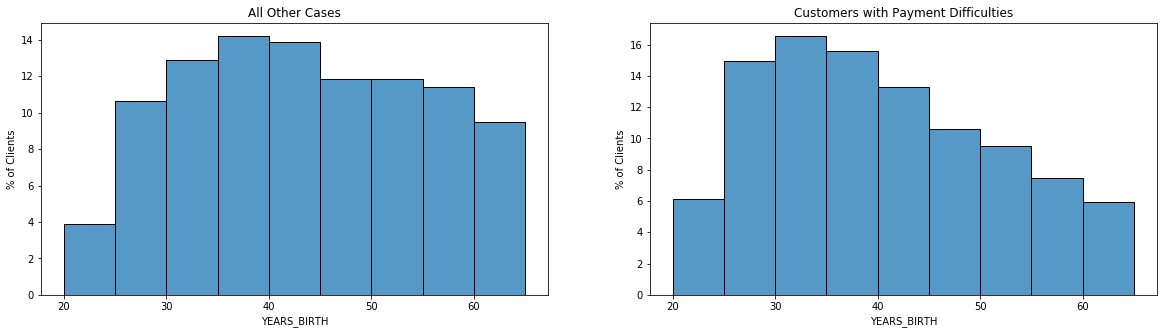

In [179]:
bins = [i for i in range(20,70,5)]
fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,5))
sns.histplot(app_data_0.YEARS_BIRTH, ax =ax[0], bins =bins, stat = "percent")
sns.histplot(app_data_1.YEARS_BIRTH, ax =ax[1], bins =bins, stat = "percent")
ax[0].set_title("All Other Cases")
ax[0].set(ylabel = "% of Clients")
ax[1].set_title("Customers with Payment Difficulties")
ax[1].set(ylabel = "% of Clients")


Text(0.5, 1.0, 'Customers with Payment Difficulties')

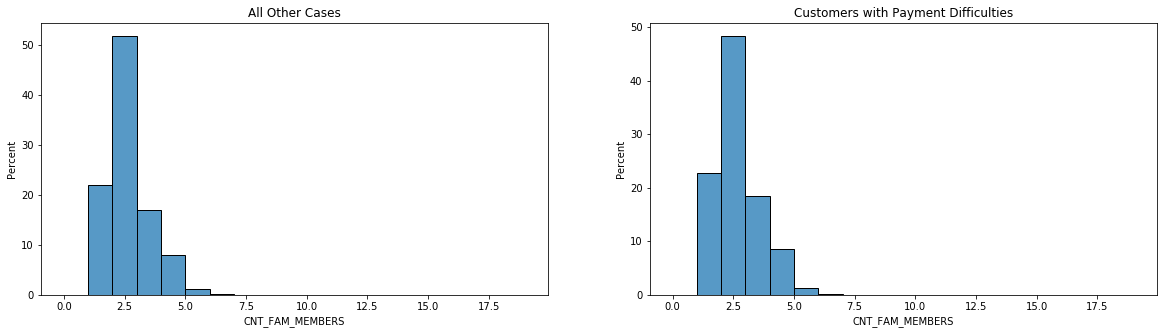

In [92]:
bins = [i for i in range(0,20,1)]
fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,5))
sns.histplot(app_data_0.CNT_FAM_MEMBERS, ax =ax[0], bins =bins, stat = "percent")
sns.histplot(app_data_1.CNT_FAM_MEMBERS, ax =ax[1], bins =bins, stat = "percent")
ax[0].set_title("All Other Cases")
ax[1].set_title("Customers with Payment Difficulties")

Text(0.5, 1.0, 'Customers with Payment Difficulties')

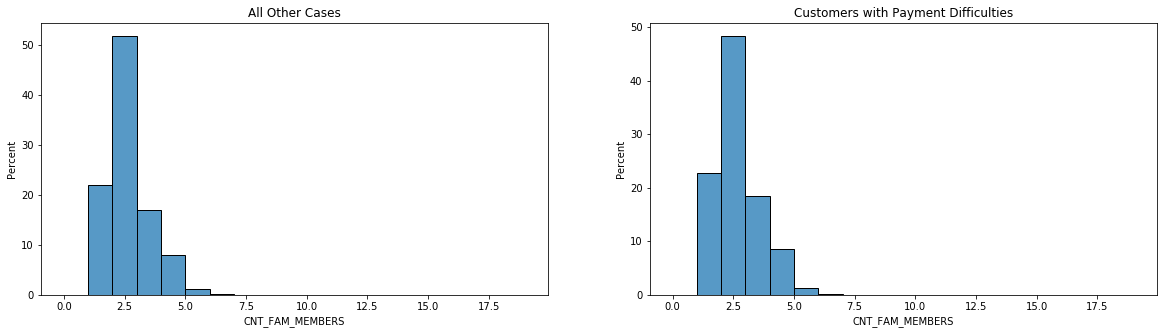

In [197]:
# Lets compare the family size between the segments
bins = [i for i in range(0,20,1)]
fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,5))
sns.histplot(app_data_0.CNT_FAM_MEMBERS, ax =ax[0], bins =bins, stat = "percent")
sns.histplot(app_data_1.CNT_FAM_MEMBERS, ax =ax[1], bins =bins, stat ="percent")
ax[0].set_title("All Other Cases")
ax[1].set_title("Customers with Payment Difficulties")

Text(0.5, 1.0, 'Customers with Payment Difficulties')

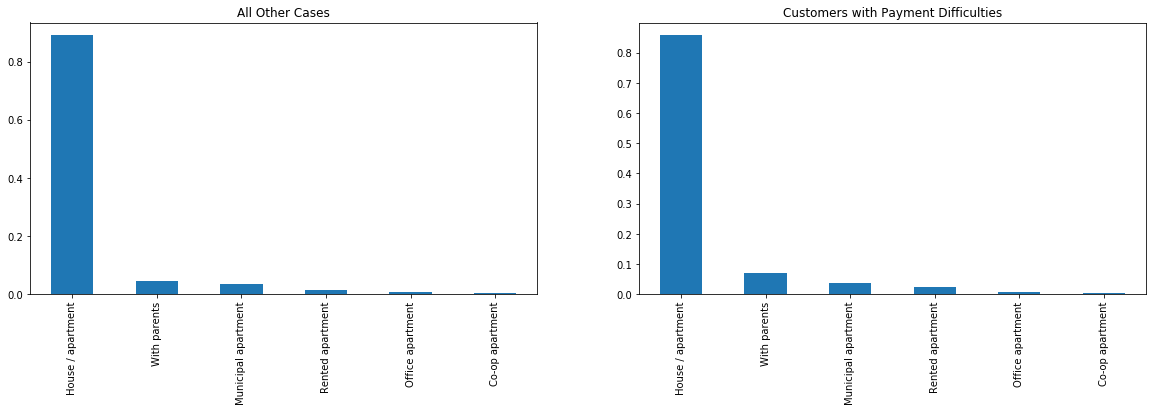

In [569]:
# Lets compare the housing type between the segments


#bins = [i for i in range(0,20,1)]
fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,5))

app_data_0.NAME_HOUSING_TYPE.value_counts(normalize = True).plot.bar(ax= ax[0])
app_data_1.NAME_HOUSING_TYPE.value_counts(normalize = True).plot.bar(ax= ax[1])
ax[0].set_title("All Other Cases")
ax[1].set_title("Customers with Payment Difficulties")

In [567]:
app_data_0.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  string
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


### Checking the Occupation Type between the segments


In [ ]:
data = app_data_1.OCCUPATION_TYPE.value_counts()

Text(0.5, 1.0, 'Customers with Payment Difficulties')

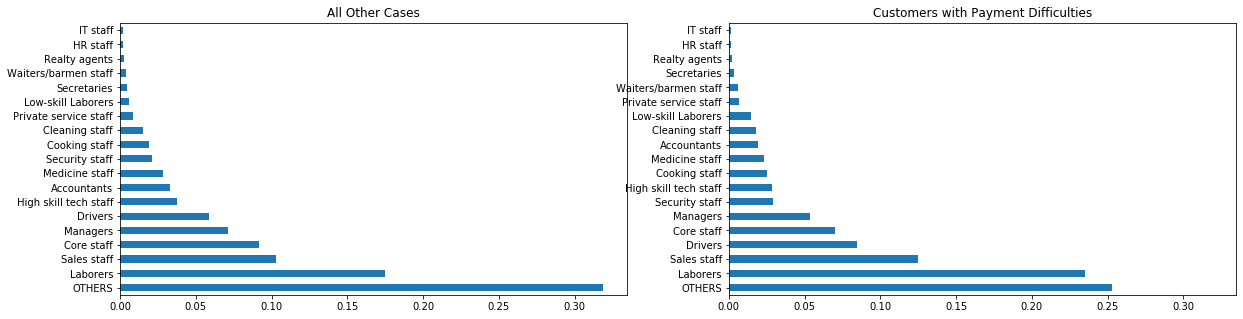

In [566]:
#bins = [i for i in range(0,20,1)]
fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,5))

app_data_0.OCCUPATION_TYPE.value_counts(normalize = True).plot.barh(ax= ax[0])
app_data_1.OCCUPATION_TYPE.value_counts(normalize = True).plot.barh(ax= ax[1])
ax[0].set_title("All Other Cases")
ax[1].set_title("Customers with Payment Difficulties")

### Comparing the Credit Amounts of the loans between the segments

Text(0.5, 1.0, 'Customers with Payment Difficulties')

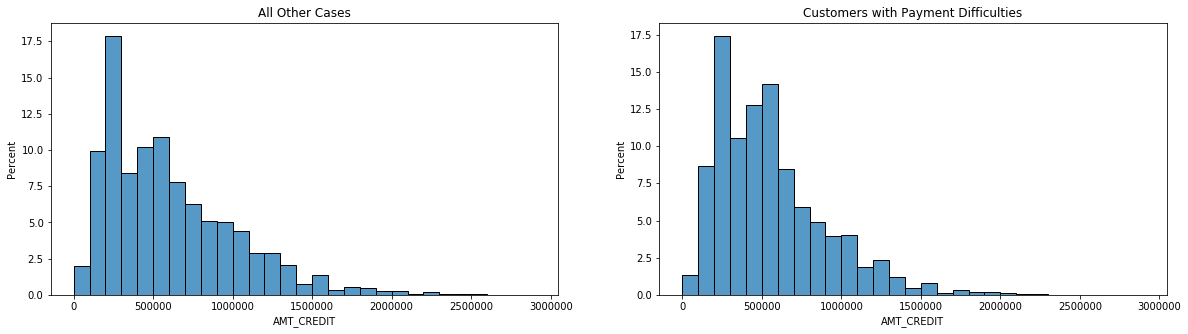

In [410]:
bins = [i for i in range(0,3000000,100000)]
fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,5))
sns.histplot(app_data_0.AMT_CREDIT, ax =ax[0],bins=bins,  stat = "percent")
sns.histplot(app_data_1.AMT_CREDIT, ax =ax[1],bins= bins, stat ="percent")
ax[0].set_title("All Other Cases")
ax[1].set_title("Customers with Payment Difficulties")

Text(0.5, 1.0, 'Customers with Payment Difficulties')

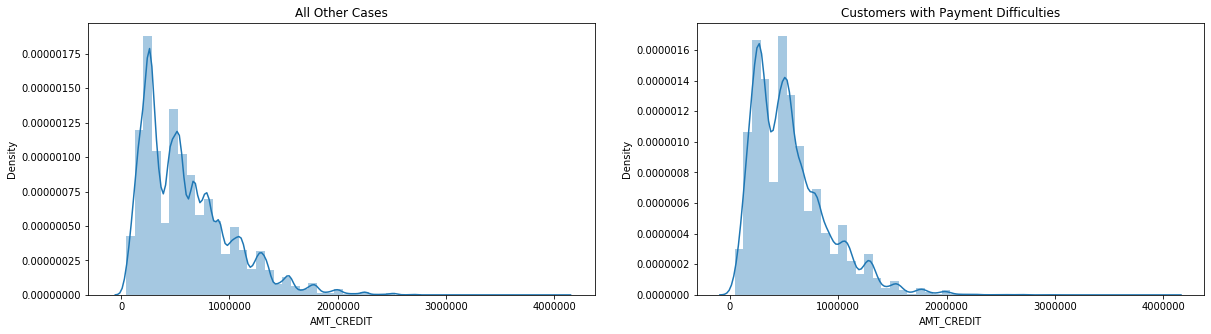

In [411]:
# Comparing the AMT_CREDIT amounts
#bins = [i for i in range(0,150000,5000)]
fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,5))
sns.distplot(app_data_0.AMT_CREDIT, ax =ax[0])
sns.distplot(app_data_1.AMT_CREDIT, ax =ax[1])
ax[0].set_title("All Other Cases")
ax[1].set_title("Customers with Payment Difficulties") 

Text(0.5, 1.0, 'Customers with Payment Difficulties')

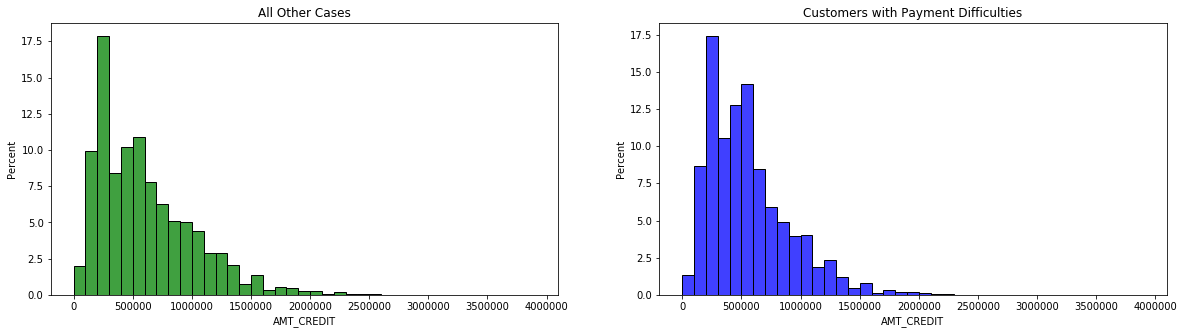

In [587]:
 # Comparing the AMT_CREDIT amounts
bins = [i for i in range(0,4000000,100000)]
fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,5))
sns.histplot(app_data_0.AMT_CREDIT, ax =ax[0],bins=bins,stat ="percent",color ="green")
sns.histplot(app_data_1.AMT_CREDIT, ax =ax[1],bins = bins,stat="percent",color ="blue")
ax[0].set_title("All Other Cases")
ax[1].set_title("Customers with Payment Difficulties")

In [593]:
## OVerlapping the 2 charts

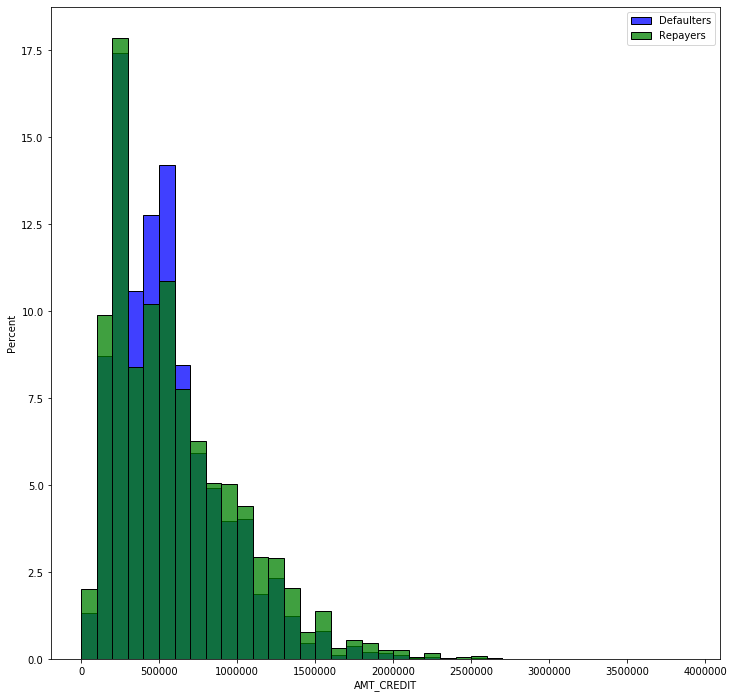

In [596]:
fig = plt.figure(figsize=(12,12))
sns.histplot(app_data_1.AMT_CREDIT, bins = bins,stat="percent",color ="blue", label ="Defaulters")
sns.histplot(app_data_0.AMT_CREDIT, bins=bins,stat ="percent",color ="green", label ="Repayers")
plt.legend()

Text(0.5, 1.0, 'Customers with Payment Difficulties')

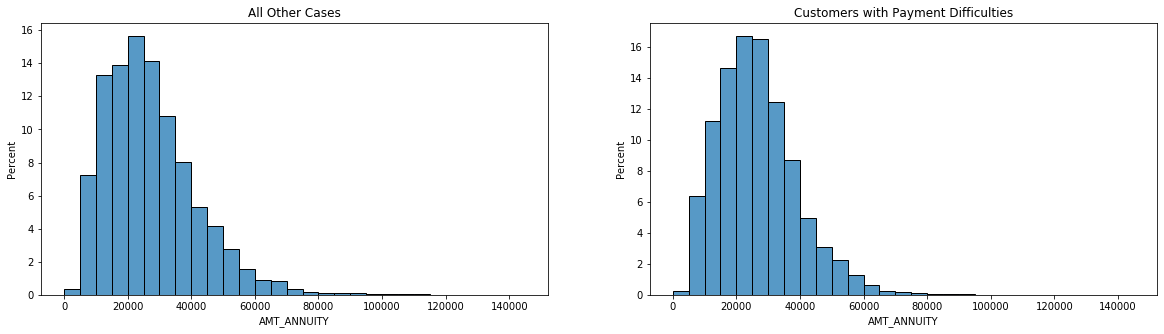

In [212]:
# Comparing the Annuity amounts
bins = [i for i in range(0,150000,5000)]
fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,5))
sns.histplot(app_data_0.AMT_ANNUITY, ax =ax[0],bins=bins, stat = "percent")
sns.histplot(app_data_1.AMT_ANNUITY, ax =ax[1],bins=bins, stat ="percent")
ax[0].set_title("All Other Cases")
ax[1].set_title("Customers with Payment Difficulties")

Text(0.5, 1.0, 'Customers with Payment Difficulties')

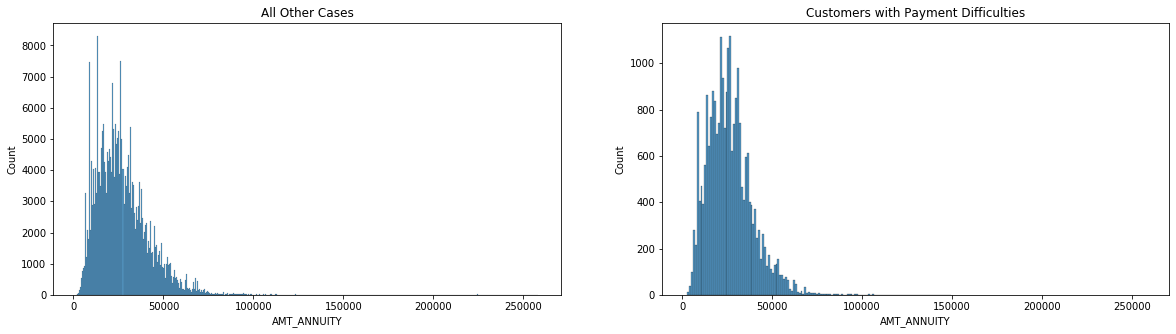

In [409]:
# Comparing the Annuity amounts
#bins = [i for i in range(0,150000,5000)]
fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,5))
sns.histplot(app_data_0.AMT_ANNUITY, ax =ax[0])
sns.histplot(app_data_1.AMT_ANNUITY, ax =ax[1])
ax[0].set_title("All Other Cases")
ax[1].set_title("Customers with Payment Difficulties")

In [529]:
## Checking the Credit To Income Ratio between the datasets

application_data.CREDIT_INCOME_RATIO.describe()

count    307499.000000
mean          3.957608
std           2.689761
min           0.004808
25%           2.018667
50%           3.265067
75%           5.160000
max          84.736842
Name: CREDIT_INCOME_RATIO, dtype: float64

In [ ]:
## 84.73 seems like an outlier. Lets do some binning and check the plots.

Text(0.5, 1.0, 'Customers with Payment Difficulties')

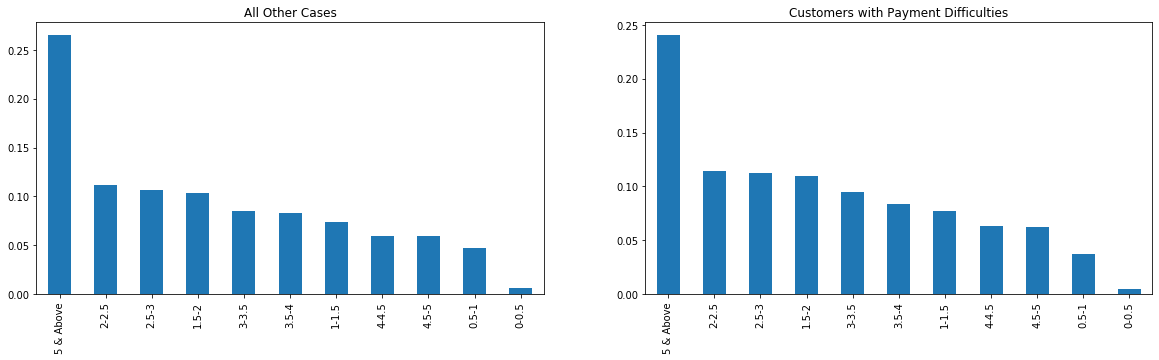

In [599]:
fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,5))

app_data_0.CREDIT_INCOME_RATIO_RANGE.value_counts(normalize = True).plot.bar(ax= ax[0])
app_data_1.CREDIT_INCOME_RATIO_RANGE.value_counts(normalize = True).plot.bar(ax= ax[1])
ax[0].set_title("All Other Cases")
ax[1].set_title("Customers with Payment Difficulties")

Text(0.5, 1.0, 'Customers with Payment Difficulties')

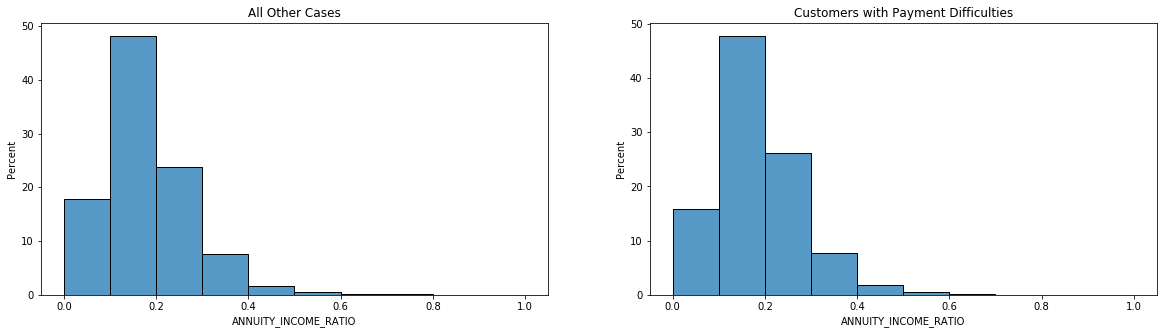

In [613]:
## Annuity Income Ratio
fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,5))
sns.histplot(app_data_0.ANNUITY_INCOME_RATIO, ax =ax[0],stat ="percent",bins =[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
sns.histplot(app_data_1.ANNUITY_INCOME_RATIO, ax =ax[1],stat ="percent", bins =[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax[0].set_title("All Other Cases")
ax[1].set_title("Customers with Payment Difficulties")

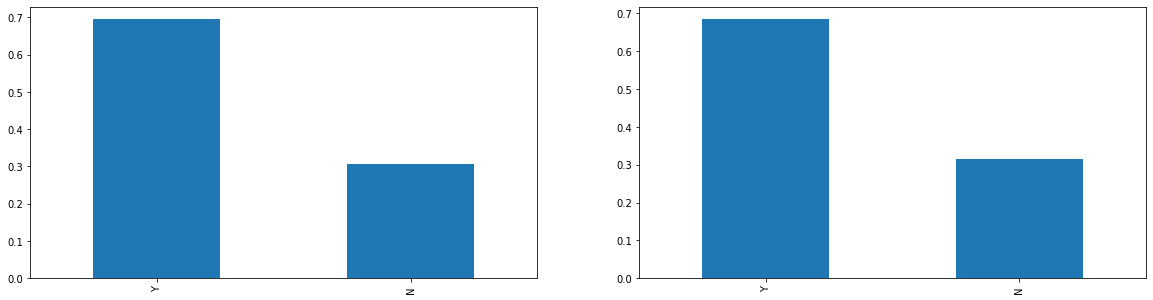

In [214]:
## People who own some form of real estate
fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,5))

app_data_0.FLAG_OWN_REALTY.value_counts(normalize = True).plot.bar(ax= ax[0])
app_data_1.FLAG_OWN_REALTY.value_counts(normalize = True).plot.bar(ax= ax[1])

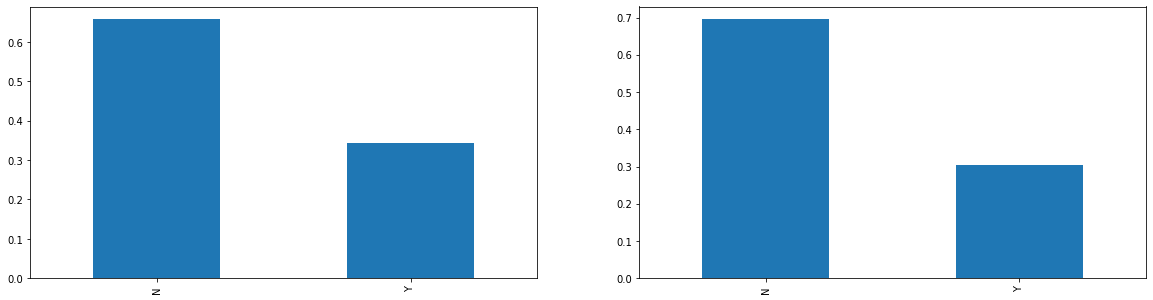

In [215]:
## People who own some car
fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,5))

app_data_0.FLAG_OWN_CAR.value_counts(normalize = True).plot.bar(ax= ax[0])
app_data_1.FLAG_OWN_CAR.value_counts(normalize = True).plot.bar(ax= ax[1])

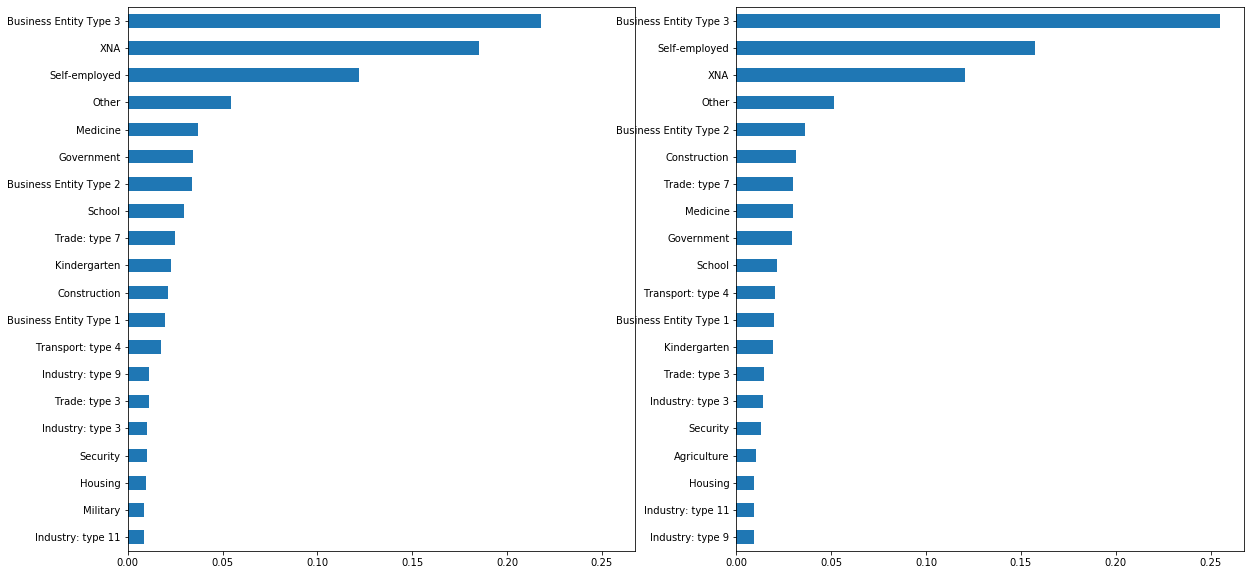

In [561]:
## People based on organization type; Finding the top 10
fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,10))

(app_data_0.ORGANIZATION_TYPE.value_counts(ascending = False, normalize = True))[0:20].plot.barh(ax= ax[0])
(app_data_1.ORGANIZATION_TYPE.value_counts(ascending = False, normalize = True))[0:20].plot.barh(ax= ax[1])
ax[0].invert_yaxis()
ax[1].invert_yaxis()

Text(0.5, 1.0, 'Customers with Payment Difficulties')

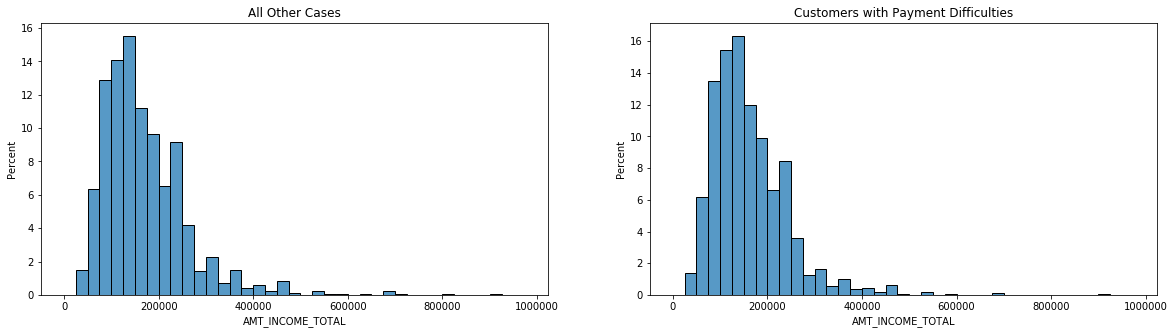

In [268]:
# Comparing the Income ranges
bins = [i for i in range(0,1000000,25000)]
fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,5))
sns.histplot(app_data_0.AMT_INCOME_TOTAL, ax =ax[0], bins =bins ,stat = "percent")
sns.histplot(app_data_1.AMT_INCOME_TOTAL, ax =ax[1], bins = bins,stat ="percent")
ax[0].set_title("All Other Cases")
ax[1].set_title("Customers with Payment Difficulties")

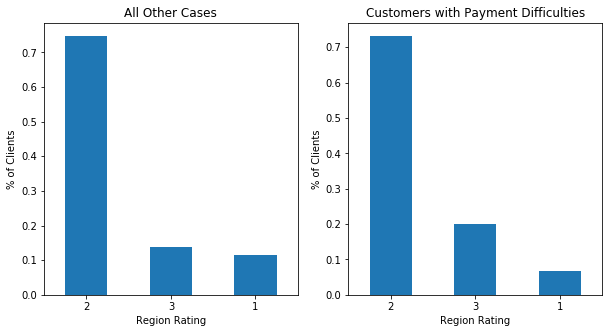

In [309]:
## People based on region type
fig,ax = plt.subplots(1,2, sharex= True, figsize =(10,5))
app_data_0.REGION_RATING_CLIENT_W_CITY.value_counts(normalize = True).plot.bar(ax= ax[0])
app_data_1.REGION_RATING_CLIENT_W_CITY.value_counts(normalize = True).plot.bar(ax= ax[1])


ax[0].set_title("All Other Cases")
ax[0].set(ylabel = "% of Clients")
ax[0].set(xlabel = "Region Rating")

ax[1].set_title("Customers with Payment Difficulties")
ax[1].set(ylabel = "% of Clients")
ax[1].set(xlabel = "Region Rating")



ax[0].xaxis.set_tick_params(rotation =0,labelsize=10)
ax[1].xaxis.set_tick_params(rotation =0,labelsize=10)
ax[0].yaxis.set_tick_params(rotation =0,labelsize=10)
ax[1].yaxis.set_tick_params(rotation =0,labelsize=10)

[Text(0.5, 0, 'Type of Loan')]

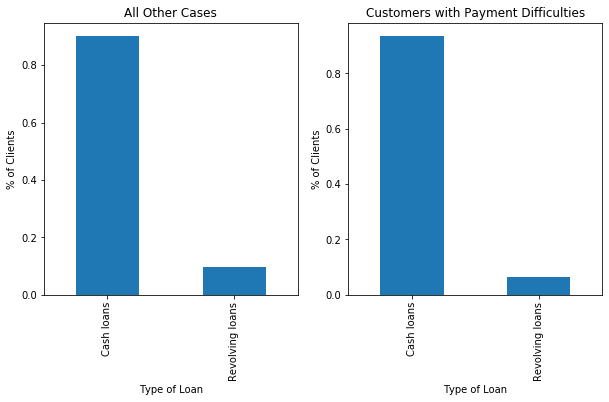

In [310]:
## People based on Type of Loan
fig,ax = plt.subplots(1,2, sharex= True, figsize =(10,5))
app_data_0.NAME_CONTRACT_TYPE.value_counts(normalize = True).plot.bar(ax= ax[0])
app_data_1.NAME_CONTRACT_TYPE.value_counts(normalize = True).plot.bar(ax= ax[1])


ax[0].set_title("All Other Cases")
ax[0].set(ylabel = "% of Clients")
ax[0].set(xlabel = "Type of Loan")

ax[1].set_title("Customers with Payment Difficulties")
ax[1].set(ylabel = "% of Clients")
ax[1].set(xlabel = "Type of Loan")



#ax[0].xaxis.set_tick_params(rotation =0,labelsize=10)
#ax[1].xaxis.set_tick_params(rotation =0,labelsize=10)
#ax[0].yaxis.set_tick_params(rotation =0,labelsize=10)
#ax[1].yaxis.set_tick_params(rotation =0,labelsize=10)

[Text(0.5, 0, 'Family Status')]

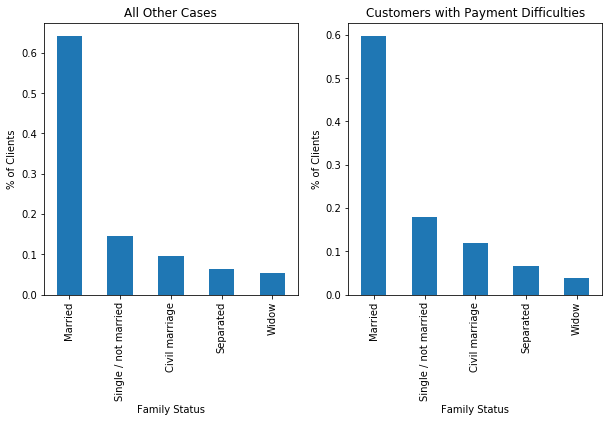

In [316]:
fig,ax = plt.subplots(1,2, sharex= True, figsize =(10,5))
app_data_0.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.bar(ax= ax[0])
app_data_1.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.bar(ax= ax[1])


ax[0].set_title("All Other Cases")
ax[0].set(ylabel = "% of Clients")
ax[0].set(xlabel = "Family Status")

ax[1].set_title("Customers with Payment Difficulties")
ax[1].set(ylabel = "% of Clients")
ax[1].set(xlabel = "Family Status")

[Text(0.5, 0, 'No. of Enquiries to Credit Bureau in last 1 yr')]

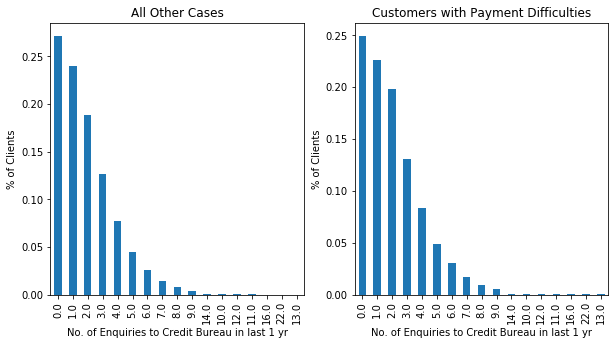

In [318]:
fig,ax = plt.subplots(1,2, sharex= True, figsize =(10,5))
app_data_0.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize = True).plot.bar(ax= ax[0])
app_data_1.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize = True).plot.bar(ax= ax[1])


ax[0].set_title("All Other Cases")
ax[0].set(ylabel = "% of Clients")
ax[0].set(xlabel = "No. of Enquiries to Credit Bureau in last 1 yr")

ax[1].set_title("Customers with Payment Difficulties")
ax[1].set(ylabel = "% of Clients")
ax[1].set(xlabel = "No. of Enquiries to Credit Bureau in last 1 yr")

[Text(0.5, 0, 'Normalized Score From External Source 2')]

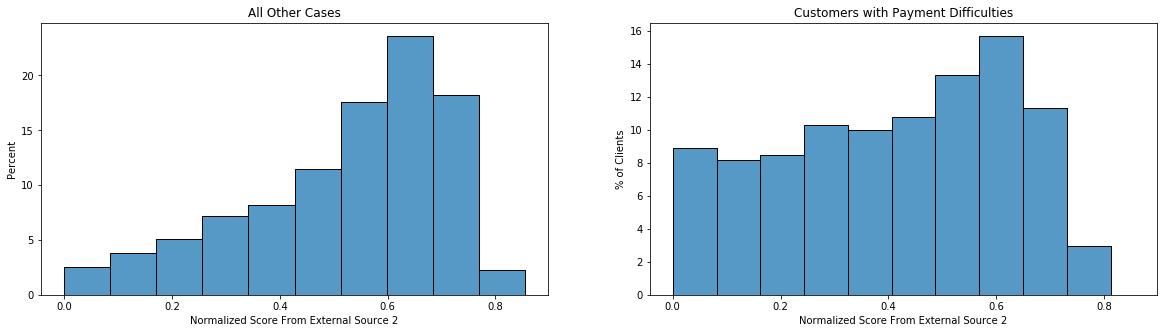

In [325]:
# Comparing the Normalized Score From External Source 2
#bins = [i for i in range(0,150000,5000)]
fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,5))
sns.histplot(app_data_0.EXT_SOURCE_2, ax =ax[0], bins=10, stat = "percent")
sns.histplot(app_data_1.EXT_SOURCE_2, ax =ax[1], bins=10, stat ="percent")
ax[0].set_title("All Other Cases")
ax[1].set_title("Customers with Payment Difficulties")

ax[0].set(xlabel = "Normalized Score From External Source 2")

ax[1].set_title("Customers with Payment Difficulties")
ax[1].set(ylabel = "% of Clients")
ax[1].set(xlabel = "Normalized Score From External Source 2")

[Text(0.5, 0, 'Normalized Score From External Source 3')]

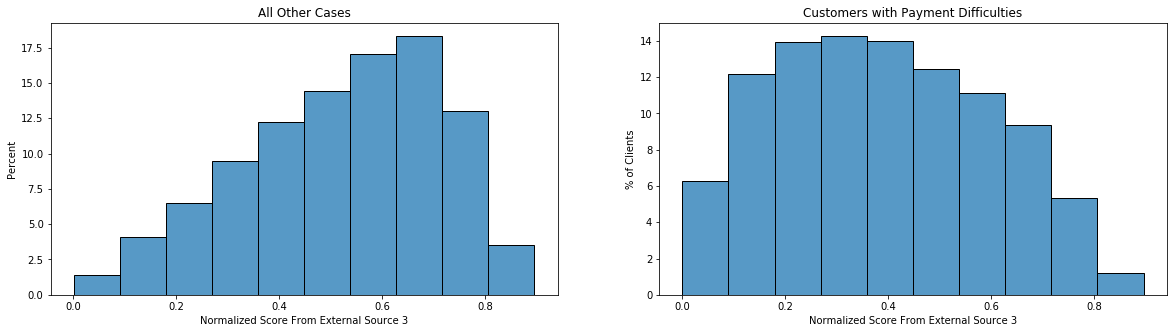

In [326]:
# Comparing the Normalized Score From External Source 3
#bins = [i for i in range(0,150000,5000)]
fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,5))
sns.histplot(app_data_0.EXT_SOURCE_3, ax =ax[0], bins=10, stat = "percent")
sns.histplot(app_data_1.EXT_SOURCE_3, ax =ax[1], bins=10, stat ="percent")
ax[0].set_title("All Other Cases")
ax[1].set_title("Customers with Payment Difficulties")

ax[0].set(xlabel = "Normalized Score From External Source 3")

ax[1].set_title("Customers with Payment Difficulties")
ax[1].set(ylabel = "% of Clients")
ax[1].set(xlabel = "Normalized Score From External Source 3")

[Text(0.5, 0, 'Family Status')]

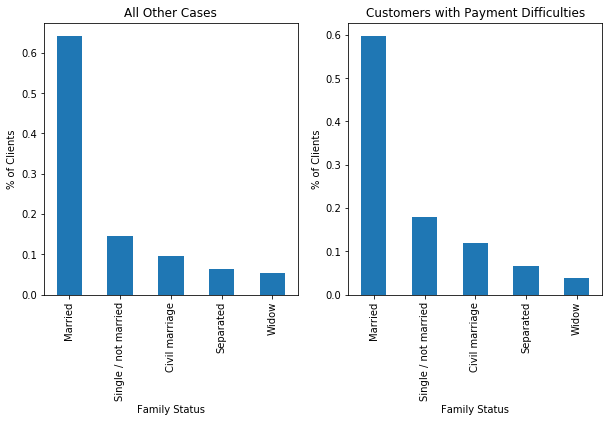

In [375]:
fig,ax = plt.subplots(1,2, sharex= True, figsize =(10,5))
app_data_0.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.bar(ax= ax[0])
app_data_1.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.bar(ax= ax[1])


ax[0].set_title("All Other Cases")
ax[0].set(ylabel = "% of Clients")
ax[0].set(xlabel = "Family Status")

ax[1].set_title("Customers with Payment Difficulties")
ax[1].set(ylabel = "% of Clients")
ax[1].set(xlabel = "Family Status")

[Text(0.5, 0, 'No. of Days Employed')]

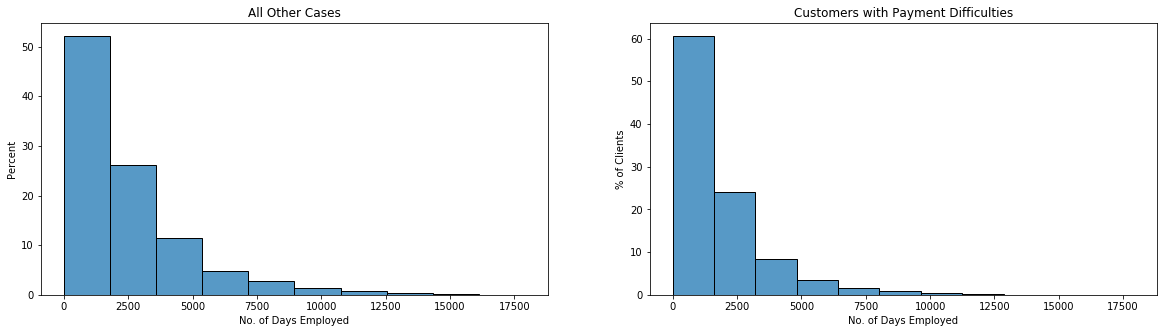

In [345]:
# Comparing the Segments based on No. of Days Employed
#bins = [i for i in range(0,150000,5000)]
temp0 = app_data_0[~(app_data_0.DAYS_EMPLOYED == 365243)]
temp1= app_data_1[~(app_data_1.DAYS_EMPLOYED == 365243)]

fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,5))
sns.histplot(temp0.DAYS_EMPLOYED, ax =ax[0], bins=10, stat = "percent")
sns.histplot(temp1.DAYS_EMPLOYED, ax =ax[1], bins=10, stat ="percent")
ax[0].set_title("All Other Cases")
ax[1].set_title("Customers with Payment Difficulties")

ax[0].set(xlabel = "No. of Days Employed")

ax[1].set_title("Customers with Payment Difficulties")
ax[1].set(ylabel = "% of Clients")
ax[1].set(xlabel = "No. of Days Employed")

[Text(0.5, 0, 'No. of Days before client changed ID for loan application')]

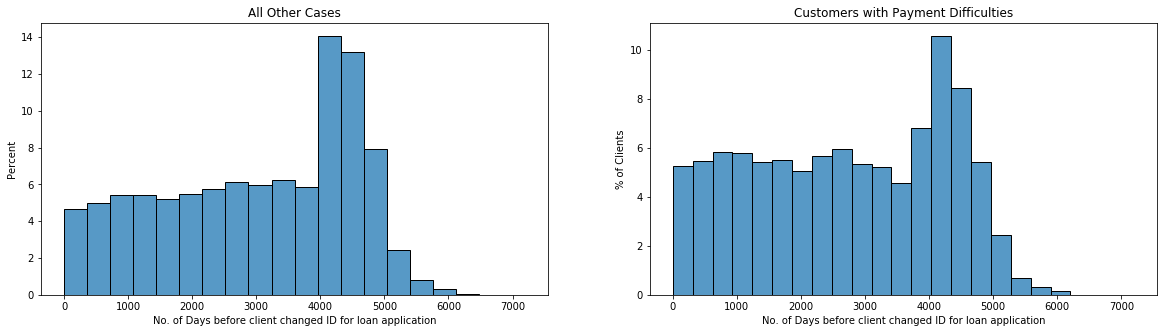

In [383]:
# Comparing the Normalized Score From External Source 3
#bins = [i for i in range(0,50,1)]
fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,5))
sns.histplot(app_data_0.DAYS_ID_PUBLISH,ax =ax[0], bins=20, stat = "percent")
sns.histplot(app_data_1.DAYS_ID_PUBLISH, ax =ax[1], bins=20, stat ="percent")
ax[0].set_title("All Other Cases")
ax[1].set_title("Customers with Payment Difficulties")

ax[0].set(xlabel = "No. of Days before client changed ID for loan application")

ax[1].set_title("Customers with Payment Difficulties")
ax[1].set(ylabel = "% of Clients")
ax[1].set(xlabel = "No. of Days before client changed ID for loan application")

[Text(0.5, 0, 'Occupation Type')]

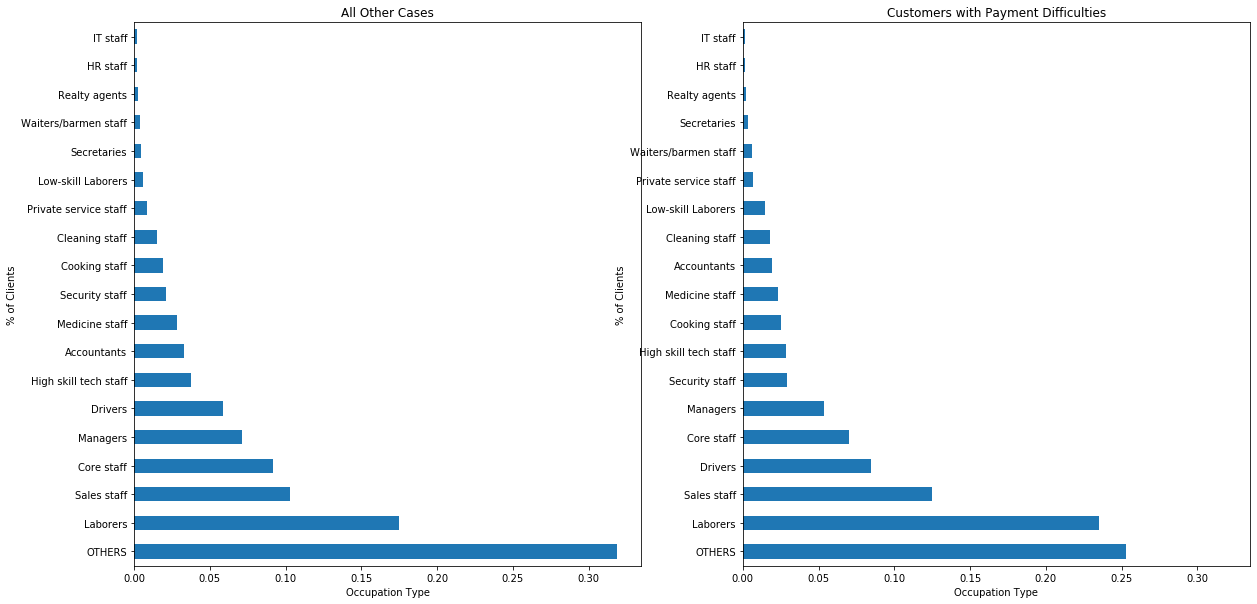

In [387]:
fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,10))
app_data_0.OCCUPATION_TYPE.value_counts(normalize = True).plot.barh(ax= ax[0])
app_data_1.OCCUPATION_TYPE.value_counts(normalize = True).plot.barh(ax= ax[1])


ax[0].set_title("All Other Cases")
ax[0].set(ylabel = "% of Clients")
ax[0].set(xlabel = "Occupation Type")

ax[1].set_title("Customers with Payment Difficulties")
ax[1].set(ylabel = "% of Clients")
ax[1].set(xlabel = "Occupation Type")

[Text(0.5, 0, 'No. of Observations of clients surrounding; defaulted on 30 Days')]

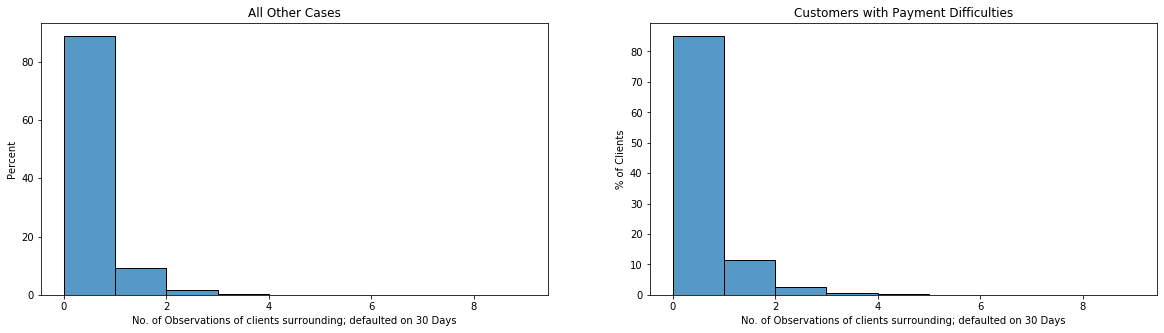

In [426]:
# Comparing the Defaults in the community
bins = [i for i in range(0,10,1)]
fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,5))
sns.histplot(app_data_0.DEF_30_CNT_SOCIAL_CIRCLE,ax =ax[0], bins=bins, stat = "percent")
sns.histplot(app_data_1.DEF_30_CNT_SOCIAL_CIRCLE, ax =ax[1], bins=bins, stat ="percent")
ax[0].set_title("All Other Cases")
ax[1].set_title("Customers with Payment Difficulties")

ax[0].set(xlabel = "No. of Observations of clients surrounding; defaulted on 30 Days")

ax[1].set_title("Customers with Payment Difficulties")
ax[1].set(ylabel = "% of Clients")
ax[1].set(xlabel = "No. of Observations of clients surrounding; defaulted on 30 Days")

[Text(0.5, 0, 'No. of Observations of clients surrounding; defaulted on 60 Days')]

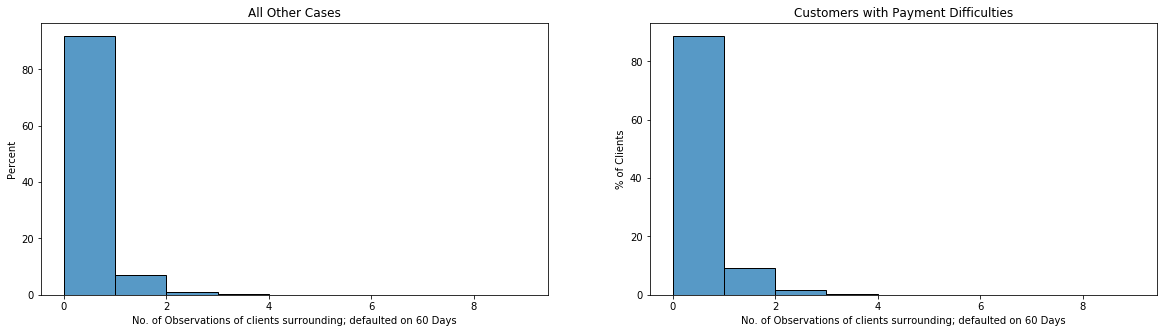

In [427]:
# Comparing the Defaults in the community
bins = [i for i in range(0,10,1)]
fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,5))
sns.histplot(app_data_0.DEF_60_CNT_SOCIAL_CIRCLE,ax =ax[0], bins=bins, stat = "percent")
sns.histplot(app_data_1.DEF_60_CNT_SOCIAL_CIRCLE, ax =ax[1], bins=bins, stat ="percent")
ax[0].set_title("All Other Cases")
ax[1].set_title("Customers with Payment Difficulties")

ax[0].set(xlabel = "No. of Observations of clients surrounding; defaulted on 60 Days")

ax[1].set_title("Customers with Payment Difficulties")
ax[1].set(ylabel = "% of Clients")
ax[1].set(xlabel = "No. of Observations of clients surrounding; defaulted on 60 Days")

[Text(0.5, 0, 'No. of Observations of clients surrounding; observable default on 30 Days')]

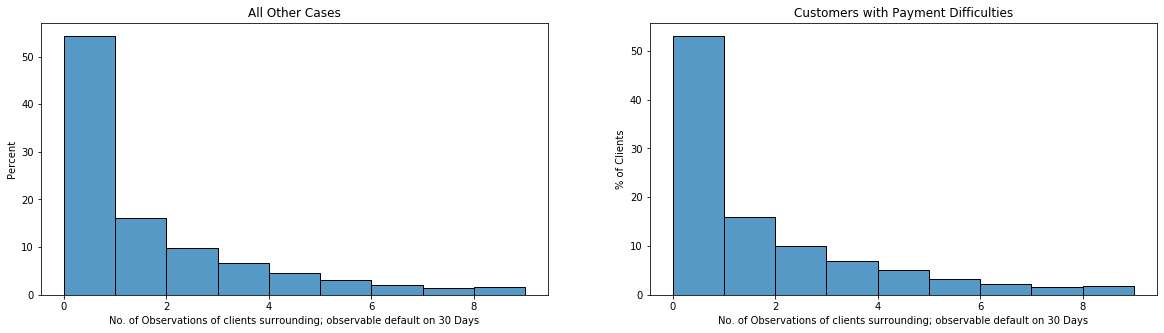

In [428]:
# Comparing the Observable Defaults in the community
bins = [i for i in range(0,10,1)]
fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,5))
sns.histplot(app_data_0.OBS_30_CNT_SOCIAL_CIRCLE,ax =ax[0], bins=bins, stat = "percent")
sns.histplot(app_data_1.OBS_30_CNT_SOCIAL_CIRCLE, ax =ax[1], bins=bins, stat ="percent")
ax[0].set_title("All Other Cases")
ax[1].set_title("Customers with Payment Difficulties")

ax[0].set(xlabel = "No. of Observations of clients surrounding; observable default on 30 Days")

ax[1].set_title("Customers with Payment Difficulties")
ax[1].set(ylabel = "% of Clients")
ax[1].set(xlabel = "No. of Observations of clients surrounding; observable default on 30 Days")

[Text(0.5, 0, 'No. of Observations of clients surrounding; observable default on 60 Days')]

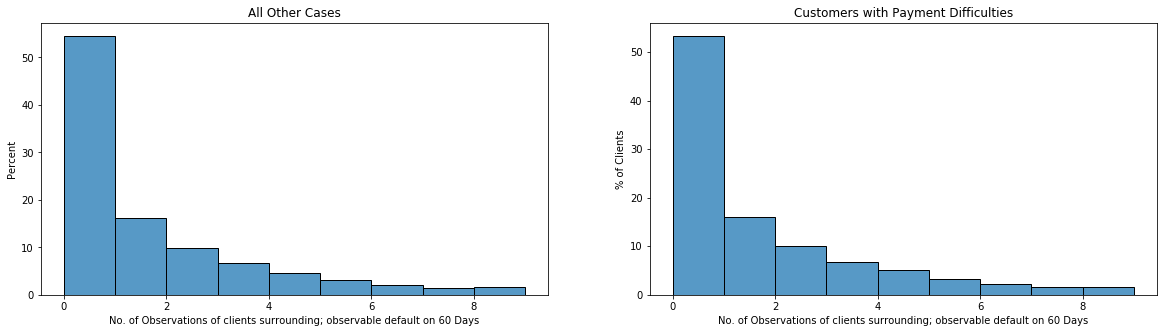

In [570]:
# Comparing the Observable Defaults in the community
bins = [i for i in range(0,10,1)]
fig,ax = plt.subplots(1,2, sharex= True, figsize =(20,5))
sns.histplot(app_data_0.OBS_60_CNT_SOCIAL_CIRCLE,ax =ax[0], bins=bins, stat = "percent")
sns.histplot(app_data_1.OBS_60_CNT_SOCIAL_CIRCLE, ax =ax[1], bins=bins, stat ="percent")
ax[0].set_title("All Other Cases")
ax[1].set_title("Customers with Payment Difficulties")

ax[0].set(xlabel = "No. of Observations of clients surrounding; observable default on 60 Days")

ax[1].set_title("Customers with Payment Difficulties")
ax[1].set(ylabel = "% of Clients")
ax[1].set(xlabel = "No. of Observations of clients surrounding; observable default on 60 Days")

### Finding the correlation in both the segments

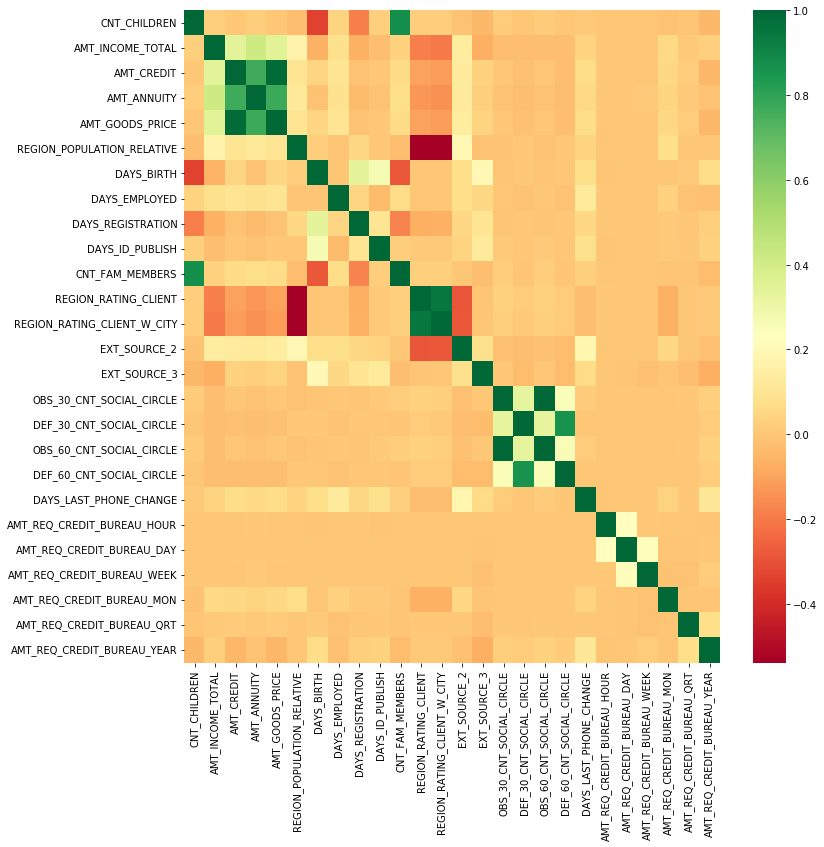

In [585]:
fig = plt.figure(figsize=(12,12))

sns.heatmap(app_data_0[['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']
].corr(), cmap ="RdYlGn")

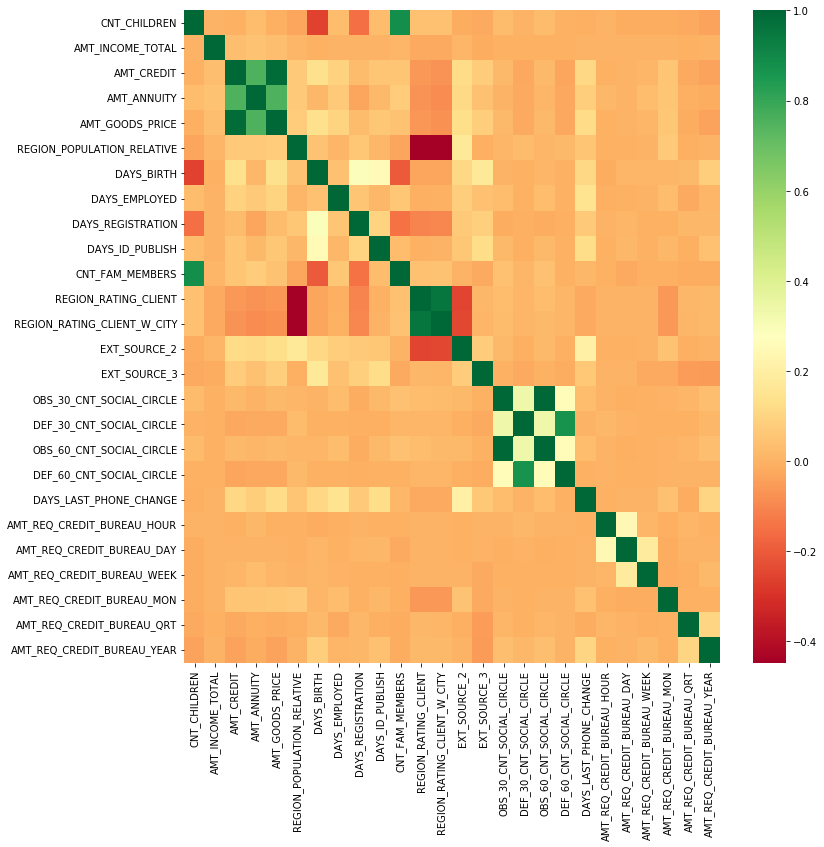

In [616]:
fig = plt.figure(figsize=(12,12))

sns.heatmap(app_data_1[['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']
].corr(), cmap ="RdYlGn")

In [620]:
app_data_0_corr = app_data_0[['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']
].corr()

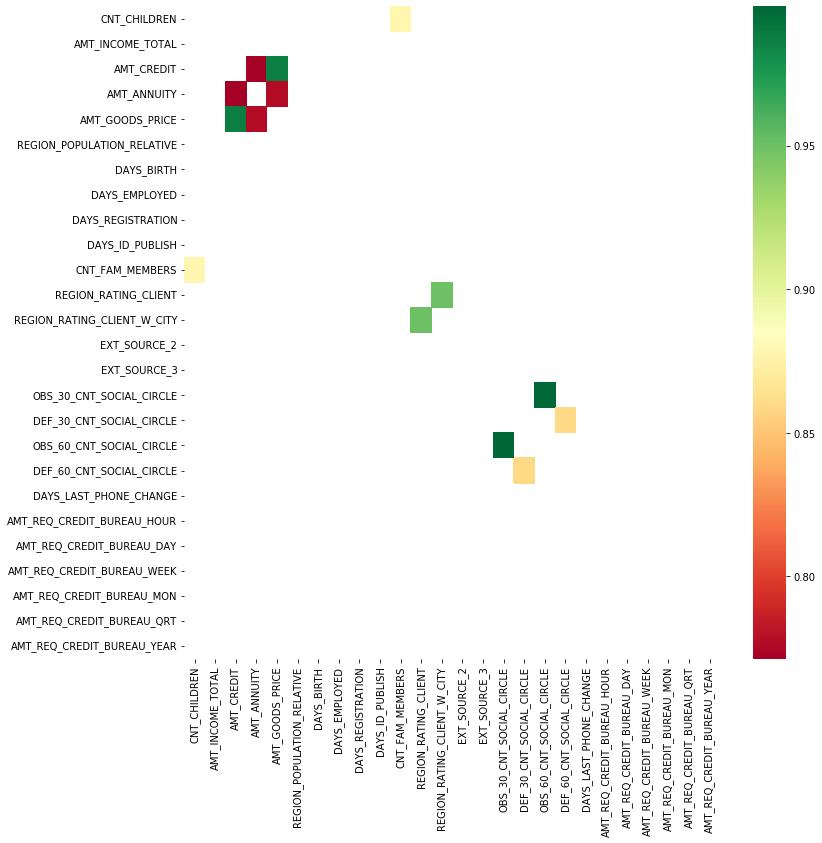

In [631]:
fig = plt.figure(figsize=(12,12))

sns.heatmap(app_data_0_corr[(app_data_0_corr <0.999) & (app_data_0_corr>0.7)], cmap ="RdYlGn")

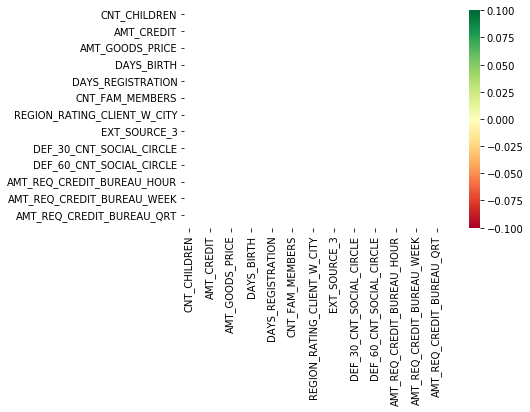

In [628]:
sns.heatmap(app_data_0_corr[(app_data_0_corr <-0.7) & (app_data_0_corr>-0.999)], cmap ="RdYlGn")

In [629]:
app_data_1_corr = app_data_1[['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']
].corr()

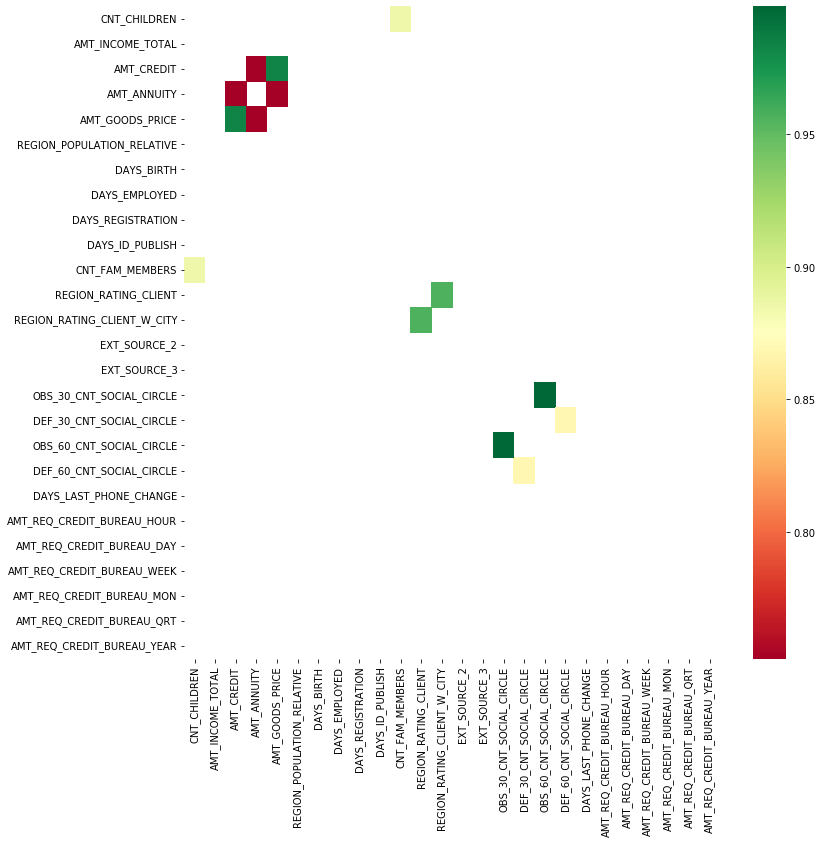

In [632]:
fig = plt.figure(figsize=(12,12))

sns.heatmap(app_data_1_corr[(app_data_1_corr <0.999) & (app_data_1_corr>0.7)], cmap ="RdYlGn")

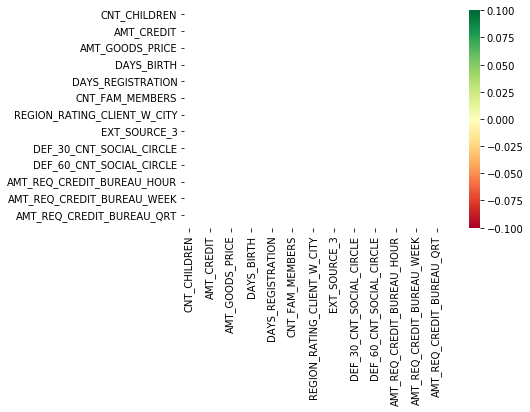

In [634]:
sns.heatmap(app_data_1_corr[(app_data_1_corr <-0.5) & (app_data_1_corr>-0.999)], cmap ="RdYlGn")

In [ ]:
### No negative correlation observed. 

### Bivariate Analysis

In [635]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

### Understanding the impact on target variable due to occupation type and salary range. Center can be 0.08 as we have only 8% defaulters in the overall dataset

In [661]:
res = pd.pivot_table(data =application_data,index='OCCUPATION_TYPE',columns ='salary_range',values= 'TARGET')

Text(0.5, 1, ' Impact on Target Variable')

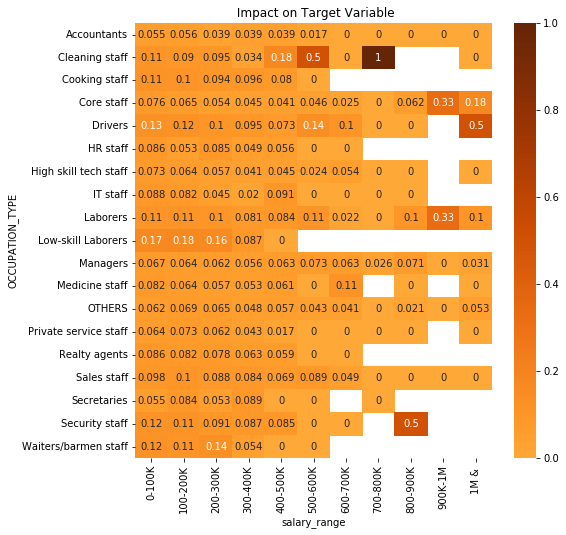

In [669]:
fig = plt.figure(figsize=(8,8))

sns.heatmap(res, annot = True,cmap ="YlOrBr", center =0.08)

plt.title(" Impact on Target Variable")

### Understanding the impact of loan_amount and salary on the target variable 

In [671]:
res = pd.pivot_table(data =application_data,index='loan_range',columns ='salary_range',values= 'TARGET')

Text(0.5, 1, ' Impact on Target Variable')

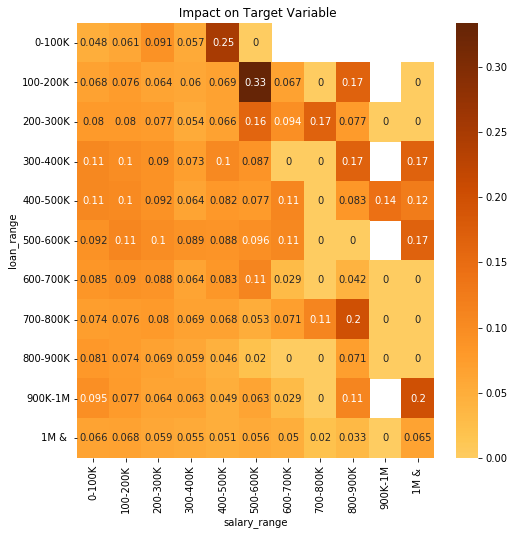

In [672]:
fig = plt.figure(figsize=(8,8))

sns.heatmap(res, annot = True,cmap ="YlOrBr", center =0.08)

plt.title(" Impact on Target Variable")

### Understand the Impact of Contract Type and Loan Range

Text(0.5, 1, ' Impact on Target Variable')

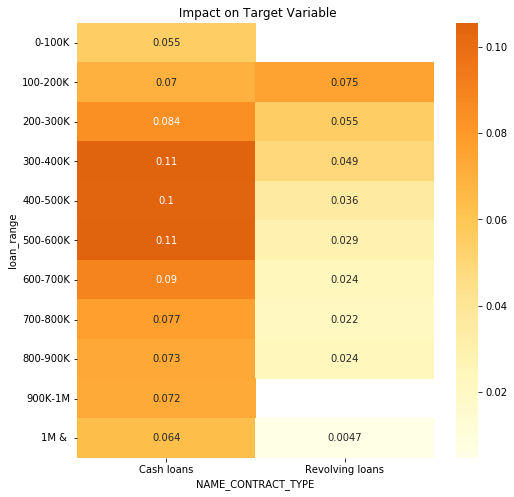

In [675]:
res = pd.pivot_table(data =application_data,index='loan_range',columns ='NAME_CONTRACT_TYPE',values= 'TARGET')
fig = plt.figure(figsize=(8,8))

sns.heatmap(res, annot = True,cmap ="YlOrBr", center =0.08)

plt.title(" Impact on Target Variable")

### Understand the Impact of Occupation Type and Region Rating Of CLient with City

Text(0.5, 1, ' Impact on Target Variable')

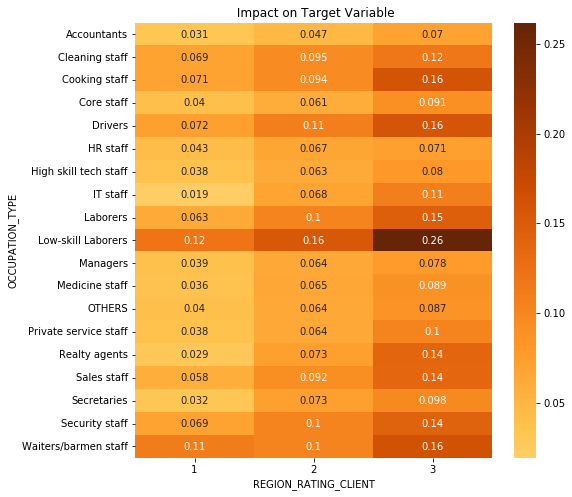

In [681]:
res = pd.pivot_table(data =application_data,index='OCCUPATION_TYPE',columns ='REGION_RATING_CLIENT',values= 'TARGET')
fig = plt.figure(figsize=(8,8))

sns.heatmap(res, annot = True,cmap ="YlOrBr", center =0.08)

plt.title(" Impact on Target Variable")

### Understand the Impact of Age Group and OCcupation Type on Target Variable

In [682]:
application_data['age_group'] = pd.cut(application_data.YEARS_BIRTH,[0,20,30,40,50,60,100], labels =["<20","20-30","30-40","40-50","50-60",">60"])

In [683]:
application_data.age_group.value_counts()

30-40    82305
40-50    76537
50-60    68060
20-30    45018
>60      35579
<20          0
Name: age_group, dtype: int64

Text(0.5, 1, ' Impact on Target Variable')

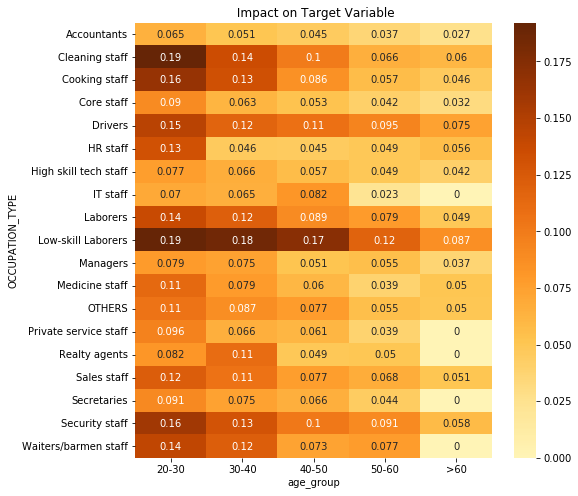

In [684]:
res = pd.pivot_table(data =application_data,index='OCCUPATION_TYPE',columns ='age_group',values= 'TARGET')
fig = plt.figure(figsize=(8,8))

sns.heatmap(res, annot = True,cmap ="YlOrBr", center =0.08)

plt.title(" Impact on Target Variable")

Text(0.5, 1, ' Impact on Target Variable')

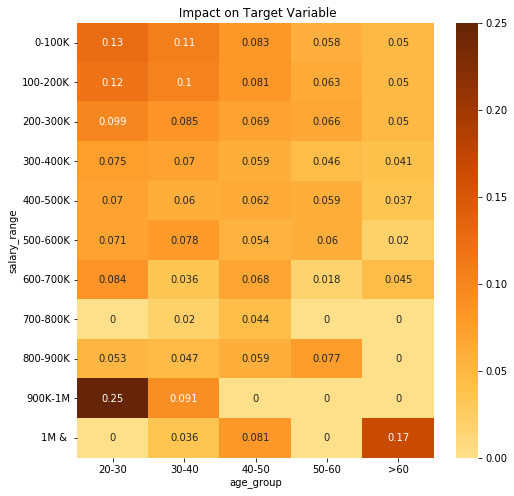

In [685]:
## Salary Range and Age Group
res = pd.pivot_table(data =application_data,index='salary_range',columns ='age_group',values= 'TARGET')
fig = plt.figure(figsize=(8,8))

sns.heatmap(res, annot = True,cmap ="YlOrBr", center =0.08)

plt.title(" Impact on Target Variable")

Text(0.5, 1, ' Impact on Target Variable')

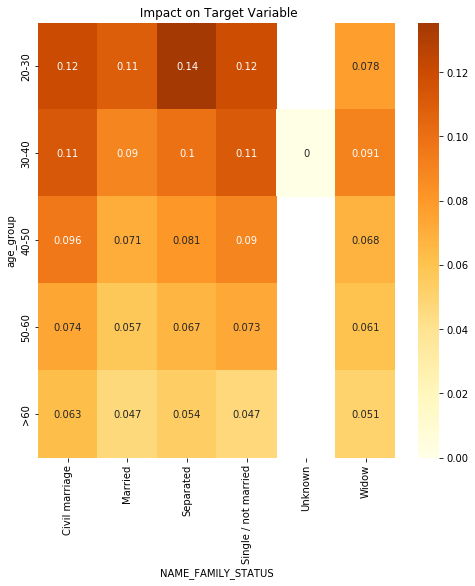

In [696]:
## Salary Range and Age Group
res = pd.pivot_table(data =application_data,index='age_group',columns ='NAME_FAMILY_STATUS',values= 'TARGET')
fig = plt.figure(figsize=(8,8))

sns.heatmap(res, annot = True,cmap ="YlOrBr", center =0.08)

plt.title(" Impact on Target Variable")

Text(0.5, 1, ' Impact on Target Variable')

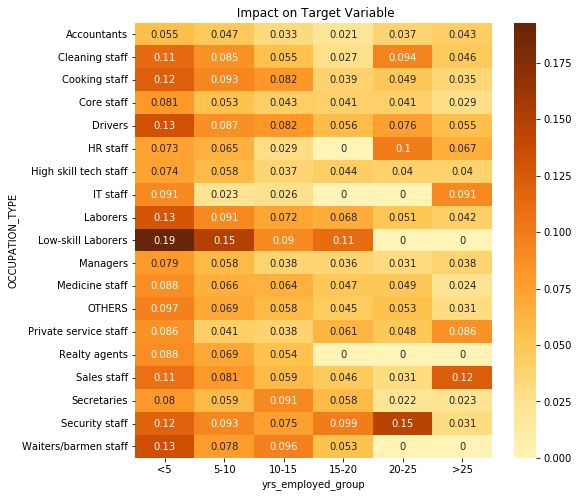

In [700]:
## Years Employed Range and Age Group
application_data['yrs_employed_group'] = pd.cut(application_data.YEARS_EMPLOYED,[0,5,10,15,20,25,100], labels =["<5","5-10","10-15","15-20","20-25",">25"])
res = pd.pivot_table(data =application_data,index='OCCUPATION_TYPE',columns ='yrs_employed_group',values= 'TARGET')
fig = plt.figure(figsize=(8,8))

sns.heatmap(res, annot = True,cmap ="YlOrBr", center =0.08)

plt.title(" Impact on Target Variable")

Text(0.5, 1, ' Impact on Target Variable')

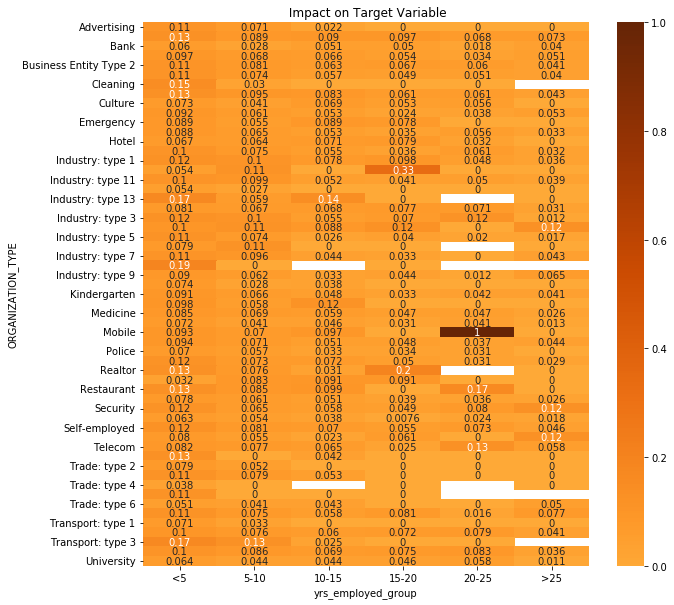

In [722]:
## Org Type and Years Employed
res = pd.pivot_table(data =application_data,index='ORGANIZATION_TYPE',columns ='yrs_employed_group',values= 'TARGET')
fig = plt.figure(figsize=(10,10))

sns.heatmap(res, annot = True,cmap ="YlOrBr", center =0.08)

plt.title(" Impact on Target Variable")

Text(0.5, 1, ' Impact on Target Variable')

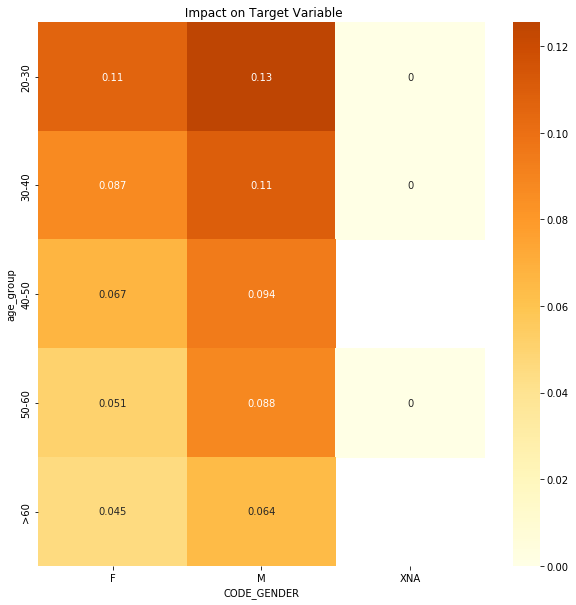

In [724]:
## Age group and Gender
res = pd.pivot_table(data =application_data,index='age_group',columns ='CODE_GENDER',values= 'TARGET')
fig = plt.figure(figsize=(10,10))

sns.heatmap(res, annot = True,cmap ="YlOrBr", center =0.08)

plt.title(" Impact on Target Variable")

Text(0.5, 1, ' Impact on Target Variable')

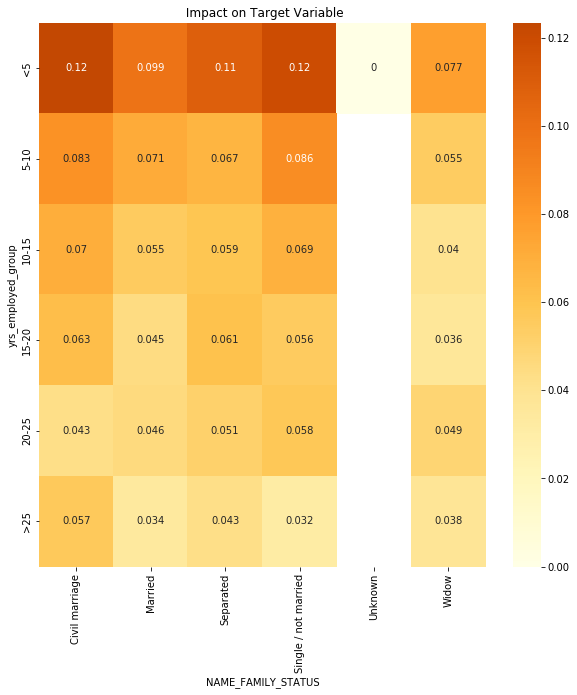

In [726]:
## Years Employed and Family Status
res = pd.pivot_table(data =application_data,index='yrs_employed_group',columns ='NAME_FAMILY_STATUS',values= 'TARGET')
fig = plt.figure(figsize=(10,10))

sns.heatmap(res, annot = True,cmap ="YlOrBr", center =0.08)

plt.title(" Impact on Target Variable")

Text(0.5, 1, ' Impact on Target Variable')

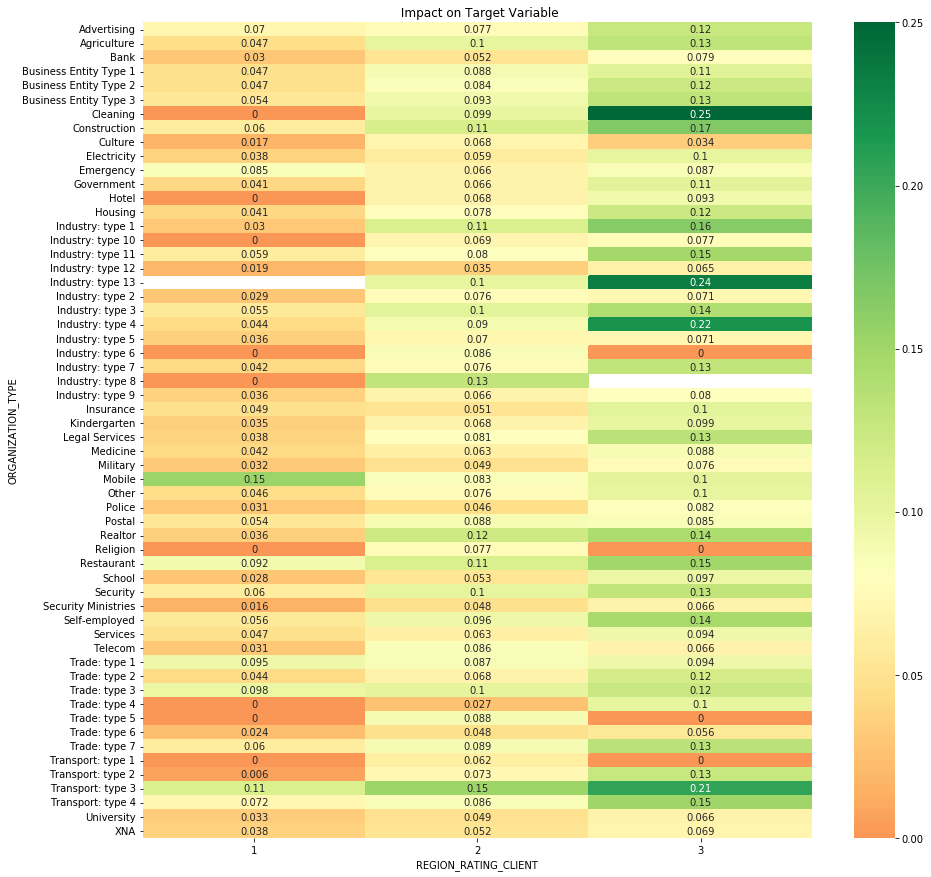

In [733]:
## Years Employed and Family Status
res = pd.pivot_table(data =application_data,index='ORGANIZATION_TYPE',columns ='REGION_RATING_CLIENT',values= 'TARGET')
fig = plt.figure(figsize=(15,15))

sns.heatmap(res, annot= True, cmap ="RdYlGn", center =0.08)

plt.title(" Impact on Target Variable")

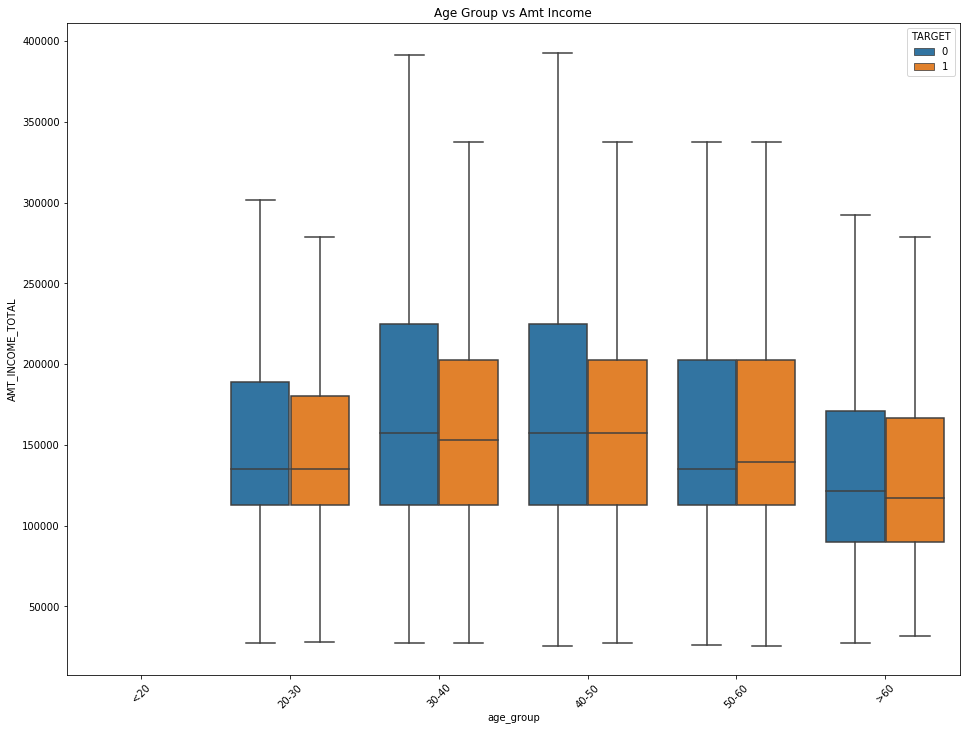

In [764]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =application_data, x='age_group',y='AMT_INCOME_TOTAL', hue ='TARGET',orient='v',showfliers=False)
plt.title('Age Group vs Amt Income')
plt.show()


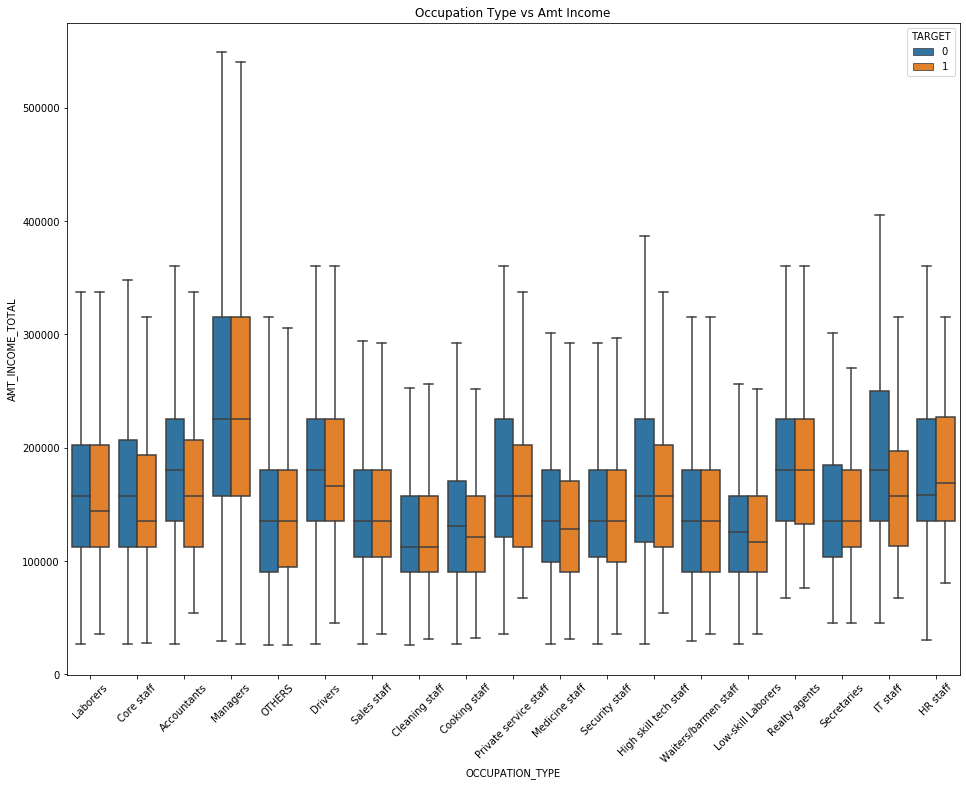

In [766]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =application_data, x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL', hue ='TARGET',orient='v',showfliers=False)
plt.title('Occupation Type vs Amt Income')
plt.show()

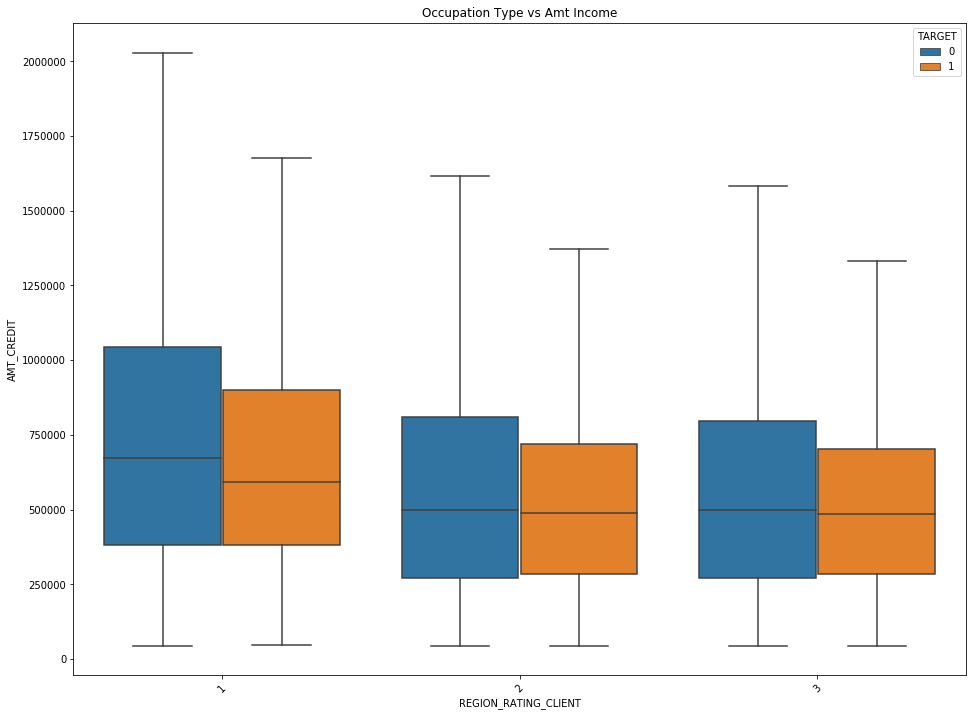

In [767]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =application_data, x='REGION_RATING_CLIENT',y='AMT_CREDIT', hue ='TARGET',orient='v',showfliers=False)
plt.title('Region Rating vs Amt Credit')
plt.show()

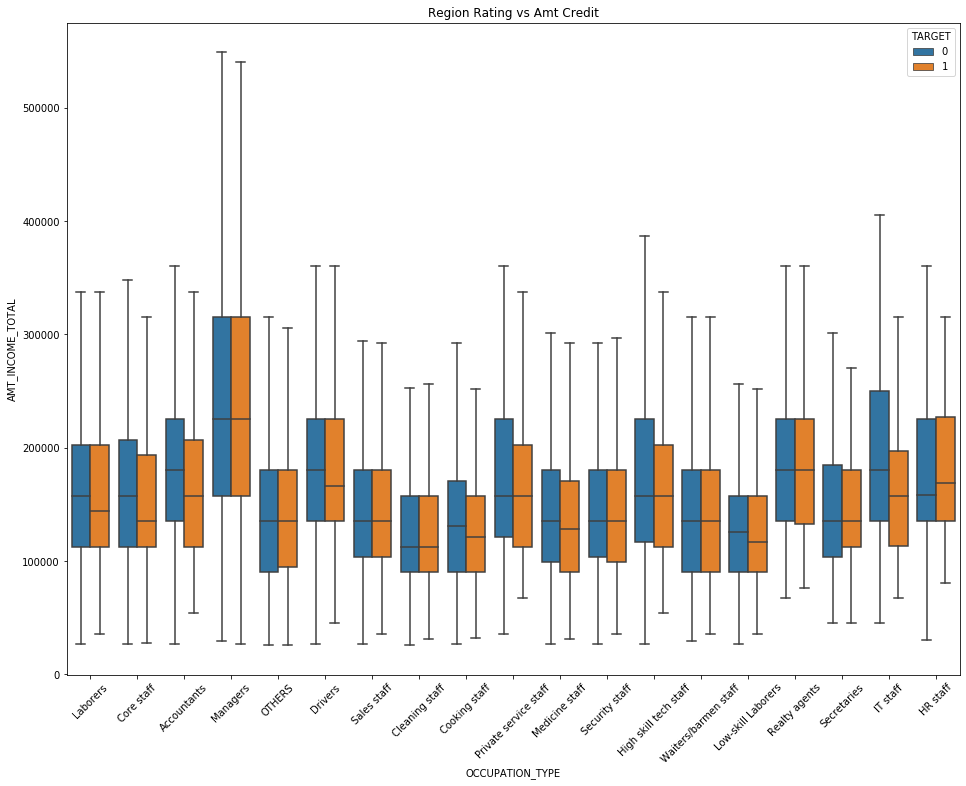

In [773]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =application_data, x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL', hue ='TARGET',orient='v',showfliers=False)
plt.title('Occupation Type vs Amt Income Total')
plt.show()

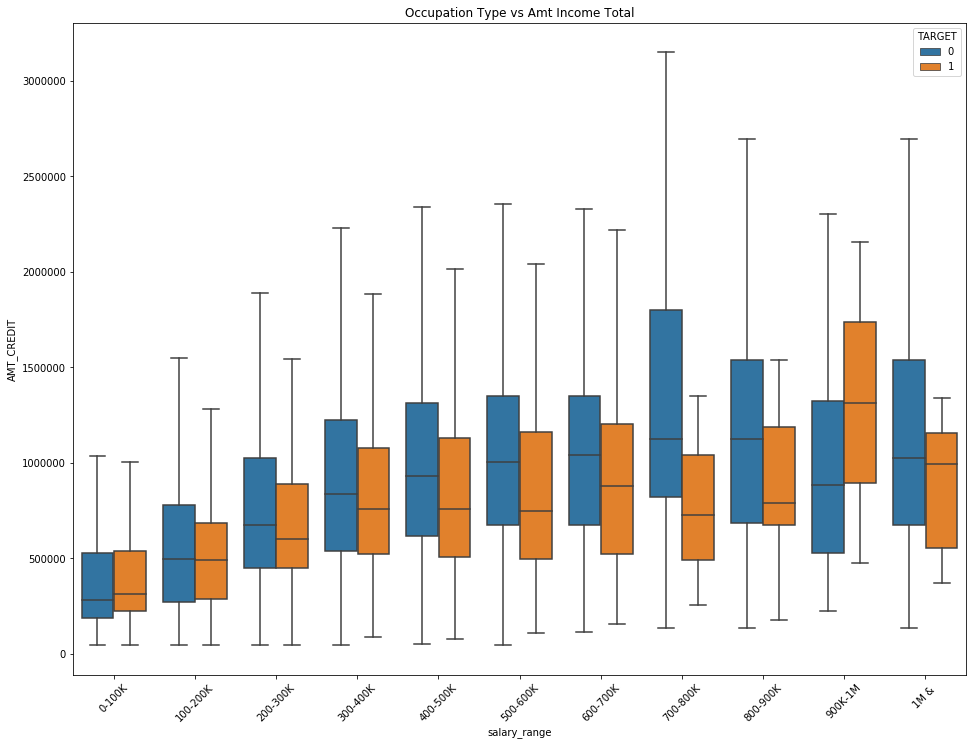

In [775]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =application_data, x='salary_range',y='AMT_CREDIT', hue ='TARGET',orient='v',showfliers=False)
plt.title('Salary Range vs Amt Credit')
plt.show()

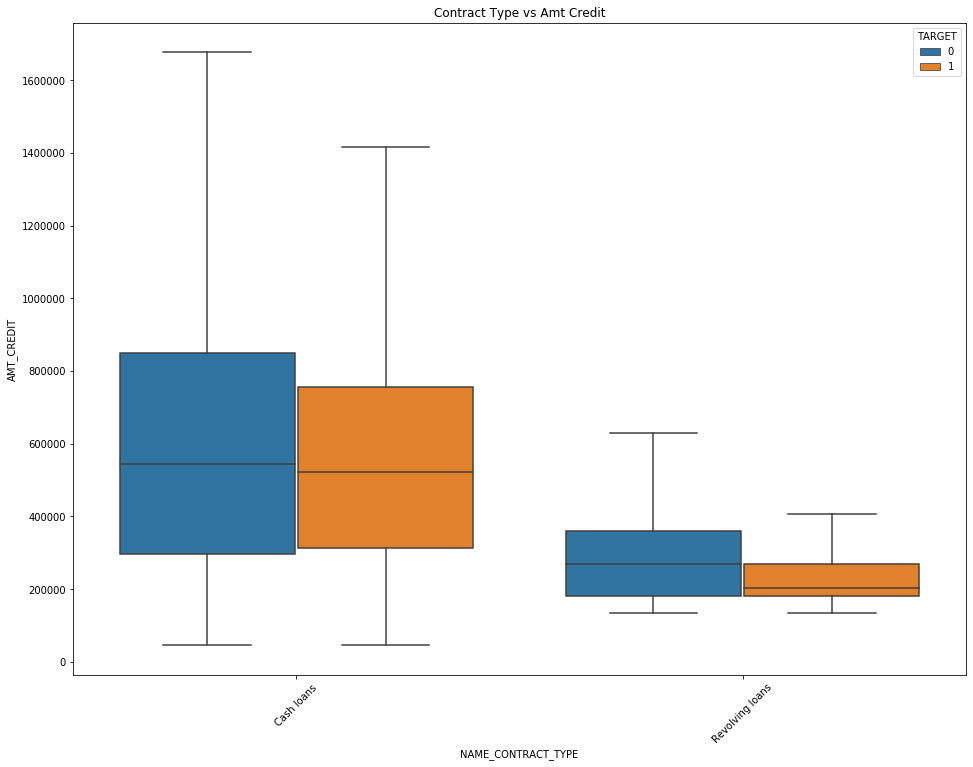

In [776]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =application_data, x='NAME_CONTRACT_TYPE',y='AMT_CREDIT', hue ='TARGET',orient='v',showfliers=False)
plt.title('Contract Type vs Amt Credit')
plt.show()

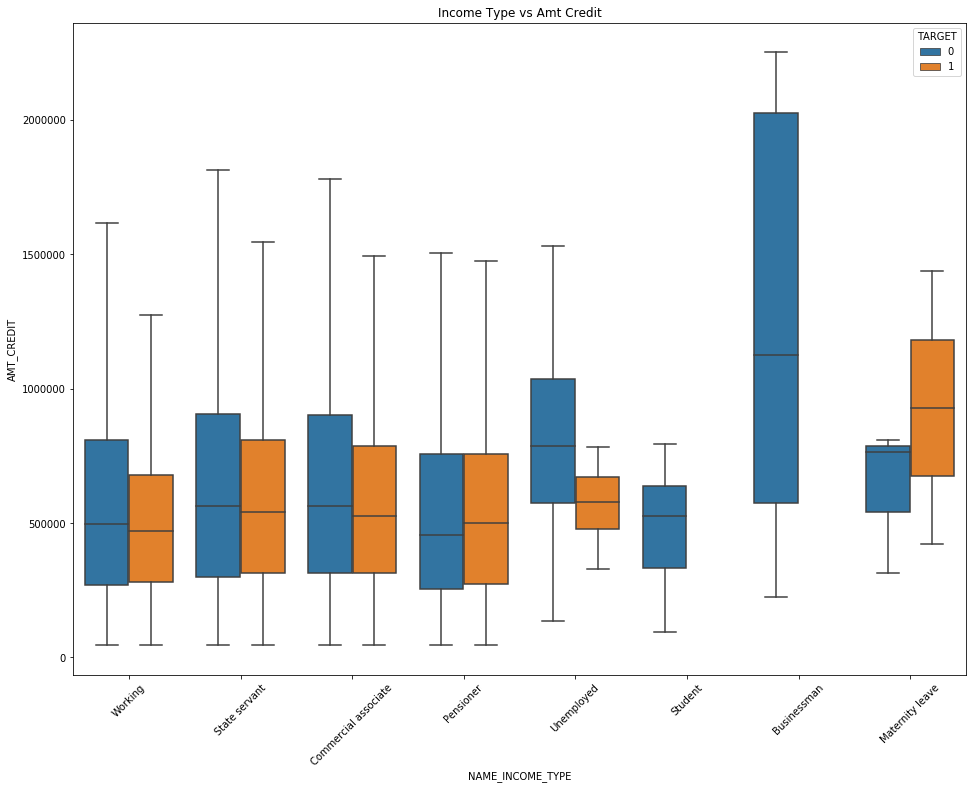

In [780]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =application_data, x='NAME_INCOME_TYPE',y='AMT_CREDIT', hue ='TARGET',orient='v',showfliers=False)
plt.title('Income Type vs Amt Credit')
plt.show()

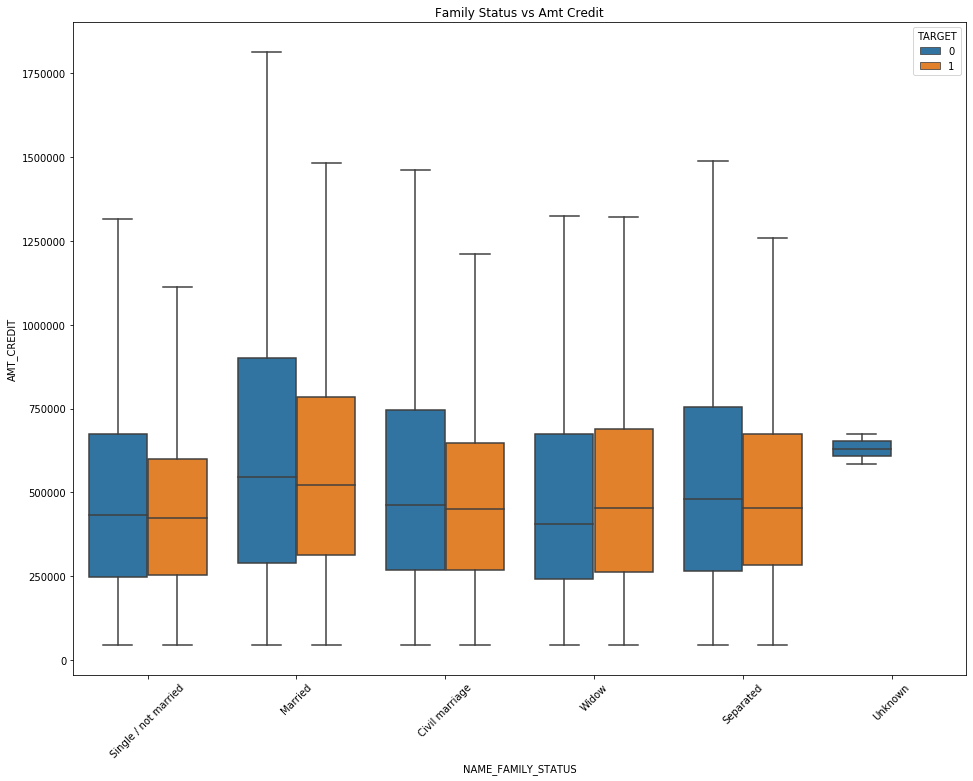

In [779]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =application_data, x='NAME_FAMILY_STATUS',y='AMT_CREDIT', hue ='TARGET',orient='v',showfliers=False)
plt.title('Family Status vs Amt Credit')
plt.show()

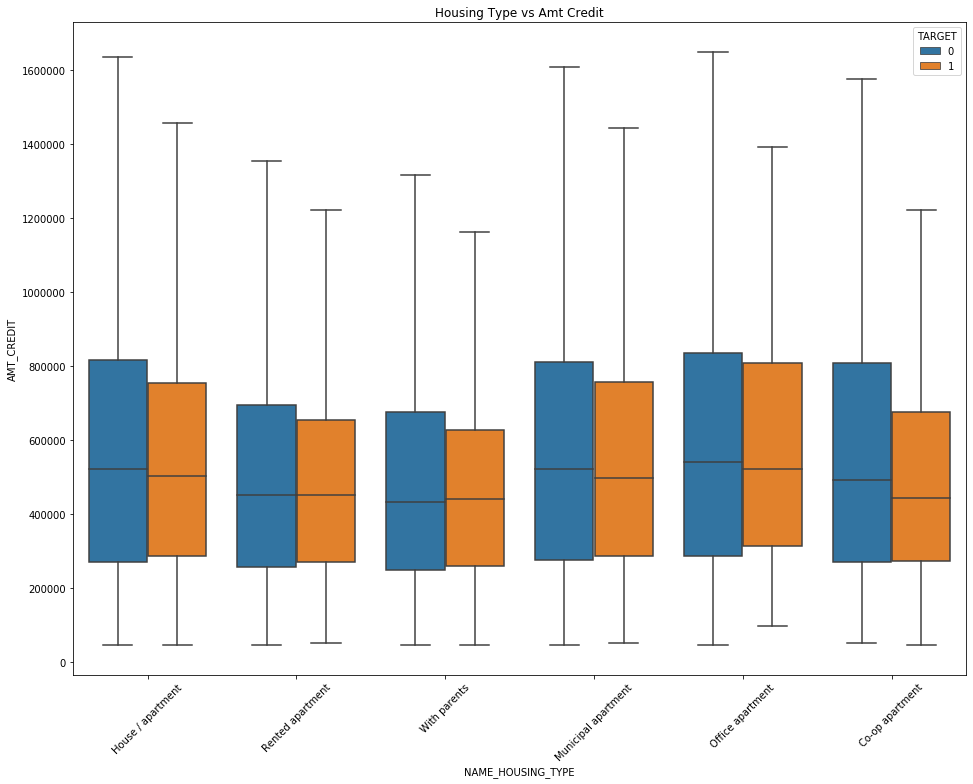

In [784]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =application_data, x='NAME_HOUSING_TYPE',y='AMT_CREDIT', hue ='TARGET',orient='v',showfliers=False)
plt.title('Housing Type vs Amt Credit')
plt.show()

In [774]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307499 entries, 0 to 307510
Data columns (total 82 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307499 non-null  int64   
 1   TARGET                       307499 non-null  int64   
 2   NAME_CONTRACT_TYPE           307499 non-null  object  
 3   CODE_GENDER                  307499 non-null  object  
 4   FLAG_OWN_CAR                 307499 non-null  object  
 5   FLAG_OWN_REALTY              307499 non-null  object  
 6   CNT_CHILDREN                 307499 non-null  int64   
 7   AMT_INCOME_TOTAL             307499 non-null  float64 
 8   AMT_CREDIT                   307499 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307221 non-null  float64 
 11  NAME_TYPE_SUITE              307499 non-null  string  
 12  NAME_INCOME_TYPE             307499 non-null

### Reading Previous application data & Checking for Columns having Null Data

In [823]:
previous_application_data = pd.read_csv("previous_application.csv")

In [814]:
previous_application_data.shape

(1670214, 37)

In [824]:
missing_data_prev = (100* previous_application_data.isnull().sum()/previous_application_data.shape[0]).reset_index()

In [825]:
missing_data_prev

index          0
0                    SK_ID_PREV   0.000000
1                    SK_ID_CURR   0.000000
2            NAME_CONTRACT_TYPE   0.000000
3                   AMT_ANNUITY  22.286665
4               AMT_APPLICATION   0.000000
5                    AMT_CREDIT   0.000060
6              AMT_DOWN_PAYMENT  53.636480
7               AMT_GOODS_PRICE  23.081773
8    WEEKDAY_APPR_PROCESS_START   0.000000
9       HOUR_APPR_PROCESS_START   0.000000
10  FLAG_LAST_APPL_PER_CONTRACT   0.000000
11       NFLAG_LAST_APPL_IN_DAY   0.000000
12            RATE_DOWN_PAYMENT  53.636480
13        RATE_INTEREST_PRIMARY  99.643698
14     RATE_INTEREST_PRIVILEGED  99.643698
15       NAME_CASH_LOAN_PURPOSE   0.000000
16         NAME_CONTRACT_STATUS   0.000000
17                DAYS_DECISION   0.000000
18            NAME_PAYMENT_TYPE   0.000000
19           CODE_REJECT_REASON   0.000000
20              NAME_TYPE_SUITE  49.119754
21             NAME_CLIENT_TYPE   0.000000
22          NAME_GOODS_CATEGORY   0.000000
23               NAME_PORTFOLIO   0.000000
24            NAME_PRODUCT_TYPE   0.000000
25                 CHANNEL_TYPE   0.000000
26             SELLERPLACE_AREA   0.000000
27         NAME_SELLER_INDUSTRY   0.000000
28                  CNT_PAYMENT  22.286366
29             NAME_YIELD_GROUP   0.000000
30          PRODUCT_COMBINATION   0.020716
31           DAYS_FIRST_DRAWING  40.298129
32               DAYS_FIRST_DUE  40.298129
33    DAYS_LAST_DUE_1ST_VERSION  40.298129
34                DAYS_LAST_DUE  40.298129
35             DAYS_TERMINATION  40.298129
36    NFLAG_INSURED_ON_APPROVAL  40.298129

### Checking columns having 40% or more missing values

In [826]:
missing_data_prev.rename(columns = {"index":"column_name",0:"% missing"},inplace = True)

## now finding the columns which have 40% or more missing values

drop_list = missing_data_prev[missing_data_prev["% missing"]>=40].column_name.tolist()



0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [829]:
missing_data_prev[missing_data_prev["% missing"]>=40]

column_name  % missing
6            AMT_DOWN_PAYMENT  53.636480
12          RATE_DOWN_PAYMENT  53.636480
13      RATE_INTEREST_PRIMARY  99.643698
14   RATE_INTEREST_PRIVILEGED  99.643698
20            NAME_TYPE_SUITE  49.119754
31         DAYS_FIRST_DRAWING  40.298129
32             DAYS_FIRST_DUE  40.298129
33  DAYS_LAST_DUE_1ST_VERSION  40.298129
34              DAYS_LAST_DUE  40.298129
35           DAYS_TERMINATION  40.298129
36  NFLAG_INSURED_ON_APPROVAL  40.298129

In [830]:
drop_list.remove("NFLAG_INSURED_ON_APPROVAL")

In [831]:
drop_list

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION']

In [832]:




### Now drop these columns which have 40% or more missing values

previous_application_data.drop(drop_list,axis =1,inplace = True)



# now get the new shape of the previous_application_data

previous_application_data.shape

(1670214, 27)

In [834]:
previous_application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 27 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

### Checking columns having 20% or more missing data

In [837]:
missing_data_prev[(missing_data_prev["% missing"]>0)&(missing_data_prev["% missing"]<=40)]

column_name  % missing
3           AMT_ANNUITY  22.286665
5            AMT_CREDIT   0.000060
7       AMT_GOODS_PRICE  23.081773
28          CNT_PAYMENT  22.286366
30  PRODUCT_COMBINATION   0.020716

In [838]:
### Checking AMT_ANNUITY
previous_application_data.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

Text(0.5, 1.0, 'AMT_ANNUITY')

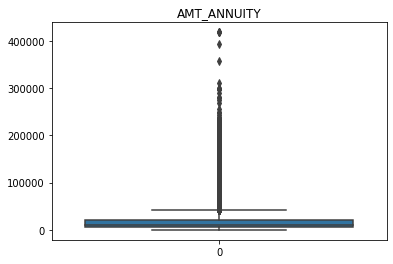

In [839]:
sns.boxplot(previous_application_data.AMT_ANNUITY)
plt.title("AMT_ANNUITY")

Text(0.5, 1.0, 'AMT_GOODS_PRICE')

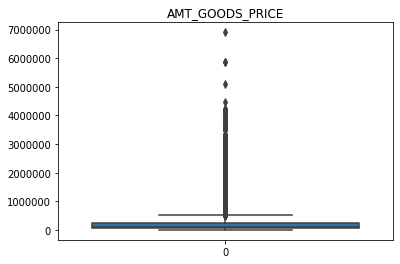

In [842]:
sns.boxplot(previous_application_data.AMT_GOODS_PRICE)
plt.title("AMT_GOODS_PRICE")

In [ ]:
##For AMT_CREDIT ; the missing values is only 0.00006% . Better to leave it as it might not affect our analysis

Text(0.5, 1.0, 'CNT_PAYMENT')

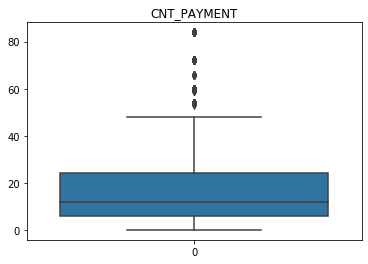

In [843]:
sns.boxplot(previous_application_data.CNT_PAYMENT)
plt.title("CNT_PAYMENT")

In [844]:
previous_application_data.CNT_PAYMENT.describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [ ]:
## This columns looks ok. The tenure seems reasonable

In [845]:
### Checking the product combination
previous_application_data.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [ ]:
### Cash is the most common product combination. Impute with Cash

In [846]:
previous_application_data.PRODUCT_COMBINATION.fillna("Cash",inplace= True)

#### Inspecting the columns in previous data. To see if there are any incorrect or unknown values

In [854]:
previous_application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 27 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [855]:
### DAYS_DECISION
previous_application_data.DAYS_DECISION.describe()

count    1.670214e+06
mean    -8.806797e+02
std      7.790997e+02
min     -2.922000e+03
25%     -1.300000e+03
50%     -5.810000e+02
75%     -2.800000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64

In [856]:
### seems like DAYS_DECISION is negatibe. Converting to absolute values
previous_application_data.DAYS_DECISION = previous_application_data.DAYS_DECISION.apply(lambda x:abs(x))

In [857]:
previous_application_data.DAYS_DECISION.describe()

count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64

In [859]:
### XAP and XNA dont reveal much information under cash loan purpose
##. But we cant impute it without full details. LEts leave it as it is.
previous_application_data.NAME_CASH_LOAN_PURPOSE.value_counts(normalize= True)

XAP                                 0.552421
XNA                                 0.405887
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000635
Buying a new car                    0.000606
Wedding / gift / holiday            0.000576
Buying a home                       0.000518
Car repairs                         0.000477
Furniture                           0.000448
Buying a holiday home / land        0.000319
Business development                0.000255
Gasification / water supply         0.000180
Buying a garage                     0.000081
Hobby     

In [860]:
### Checking the name payment type. XNA constitutes 38% of the data. We can leave it as it is
previous_application_data.NAME_PAYMENT_TYPE.value_counts(normalize = True)

Cash through the bank                        0.618814
XNA                                          0.375631
Non-cash from your account                   0.004905
Cashless from the account of the employer    0.000650
Name: NAME_PAYMENT_TYPE, dtype: float64

In [ ]:
### Checking the CODE Reject Reason. XAP doesnt indicate anything. But we can leave the data as it is

In [861]:
previous_application_data.CODE_REJECT_REASON.value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

In [862]:
## Channel Type seems ok.
previous_application_data.CHANNEL_TYPE.value_counts()

Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

In [863]:
## Client Type seems ok.We can replace XNA with Repeater.As Repeater is the most frequent type of client. 
previous_application_data.NAME_CLIENT_TYPE.value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

In [864]:
previous_application_data['NAME_CLIENT_TYPE'] = previous_application_data['NAME_CLIENT_TYPE'].apply(lambda x: 'Repeater' if x == 'XNA' else x)

In [865]:
previous_application_data.NAME_CLIENT_TYPE.value_counts()

Repeater     1233202
New           301363
Refreshed     135649
Name: NAME_CLIENT_TYPE, dtype: int64

In [867]:
previous_application_data.NAME_PRODUCT_TYPE.value_counts()

XNA        1063666
x-sell      456287
walk-in     150261
Name: NAME_PRODUCT_TYPE, dtype: int64

In [868]:
previous_application_data.NAME_GOODS_CATEGORY.value_counts()

XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
House Construction               1
Animals                          1
Name: NAME_GOODS_CAT

In [869]:
previous_application_data.NAME_PORTFOLIO.value_counts()

POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

In [870]:
previous_application_data.NAME_SELLER_INDUSTRY.value_counts()

XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64

In [872]:
previous_application_data.NAME_YIELD_GROUP.value_counts()

XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

In [873]:
previous_application_data.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

#### Merging the Data frames. Current and Previous. SK_ID_CURR is the common column for both the applications

In [847]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [848]:
previous_application_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [874]:
total_application_data = pd.merge(application_data, previous_application_data, on="SK_ID_CURR", how ="inner")

In [876]:
total_application_data.shape

(1413608, 108)

In [885]:
total_application_data.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413608 entries, 0 to 1413607
Data columns (total 108 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   SK_ID_CURR                    int64   
 1   TARGET                        int64   
 2   NAME_CONTRACT_TYPE_x          object  
 3   CODE_GENDER                   object  
 4   FLAG_OWN_CAR                  object  
 5   FLAG_OWN_REALTY               object  
 6   CNT_CHILDREN                  int64   
 7   AMT_INCOME_TOTAL              float64 
 8   AMT_CREDIT_x                  float64 
 9   AMT_ANNUITY_x                 float64 
 10  AMT_GOODS_PRICE_x             float64 
 11  NAME_TYPE_SUITE               string  
 12  NAME_INCOME_TYPE              object  
 13  NAME_EDUCATION_TYPE           object  
 14  NAME_FAMILY_STATUS            object  
 15  NAME_HOUSING_TYPE             object  
 16  REGION_POPULATION_RELATIVE    float64 
 17  DAYS_BIRTH                    int64   
 18  D

### Analyzing the Categorical Variables

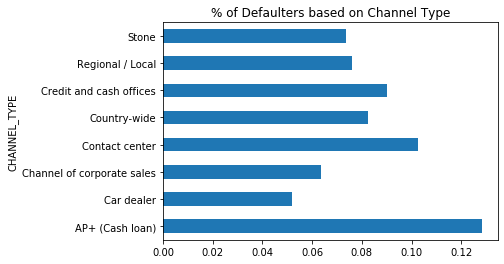

In [898]:
### Channel Type and Impact on Target Variable. AP+ Cash Loan and Contact Center Loans seem to have a higher default rate
total_application_data.groupby(by="CHANNEL_TYPE")["TARGET"].mean().plot.barh()
plt.title('% of Defaulters based on Channel Type')
plt.show()

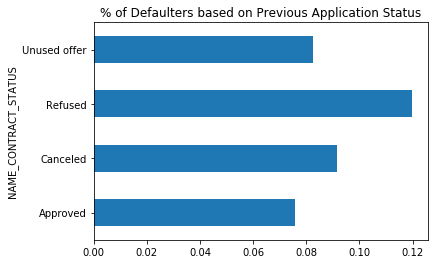

In [905]:
## Checking based on previous application status
total_application_data.groupby(by="NAME_CONTRACT_STATUS")["TARGET"].mean().plot.barh()
plt.title('% of Defaulters based on Previous Application Status')
plt.show()

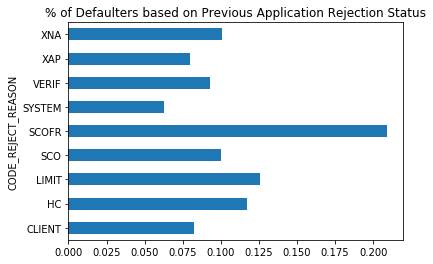

In [922]:
## Checking based on previous application status
total_application_data.groupby(by="CODE_REJECT_REASON")["TARGET"].mean().plot.barh()
plt.title('% of Defaulters based on Previous Application Rejection Status')
plt.show()

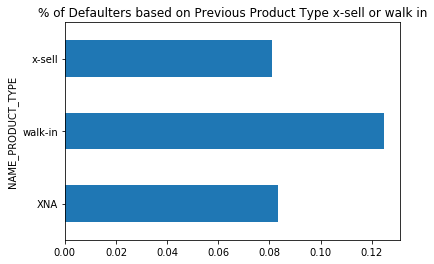

In [916]:
## Based on PRoduct Type taken by customer (x-sell or walk in)
total_application_data.groupby(by="NAME_PRODUCT_TYPE")["TARGET"].mean().plot.barh()
plt.title('% of Defaulters based on Previous Product Type x-sell or walk in')
plt.show()

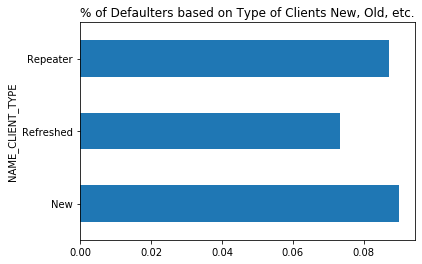

In [924]:
## Based on Existing vs NEw Customers
total_application_data.groupby(by="NAME_CLIENT_TYPE")["TARGET"].mean().plot.barh()
plt.title('% of Defaulters based on Type of Clients New, Old, etc.')
plt.show()

In [928]:
total_application_data['DAYS_DECISION'].describe() 

count    1.413608e+06
mean     8.803695e+02
std      7.835401e+02
min      1.000000e+00
25%      2.710000e+02
50%      5.820000e+02
75%      1.313000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64

In [ ]:
## Binning the DAYS_DECISION into years i.e. years before a decision was taken on the previous application

In [932]:
bins = [0,1,2,3,4,5,6,7,8,9,10]
labels = ["0-1","1-2","2-3","3-4","4-5","5-6","6-7","7-8","8-9","9 & Above"]
total_application_data['YEARS_DECISION_RANGE'] = pd.cut(total_application_data.DAYS_DECISION/365,bins=bins, labels =labels)

In [935]:
total_application_data.YEARS_DECISION_RANGE.value_counts()

0-1          500780
1-2          309073
2-3          179067
3-4          112095
4-5           86616
6-7           85379
7-8           70272
5-6           70053
8-9             273
9 & Above         0
Name: YEARS_DECISION_RANGE, dtype: int64

Text(0.5, 1, ' Impact on Target Variable')

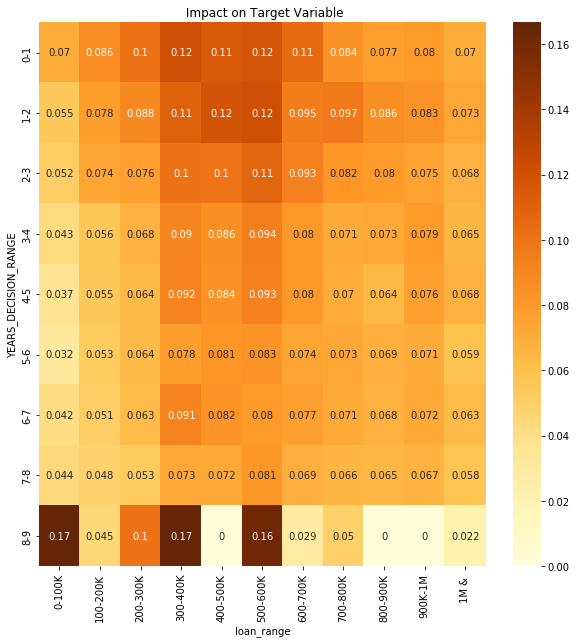

In [936]:
## YEARS_DECISION_RANGE and AMT_CREDIT
res = pd.pivot_table(data =total_application_data,index='YEARS_DECISION_RANGE',columns ='loan_range',values= 'TARGET')
fig = plt.figure(figsize=(10,10))

sns.heatmap(res, annot = True,cmap ="YlOrBr", center =0.08)

plt.title(" Impact on Target Variable")

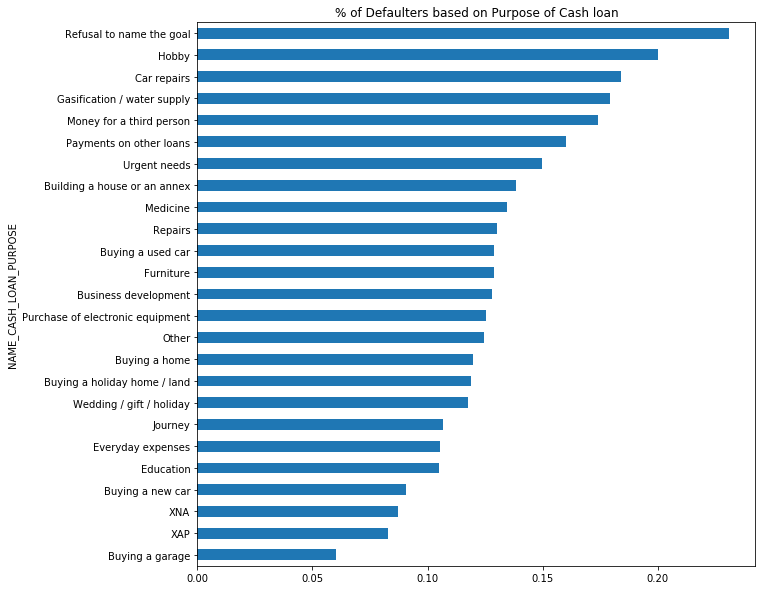

In [942]:
## Based on Purpose of previous loan
fig = plt.figure(figsize=(10,10))
total_application_data.groupby(by="NAME_CASH_LOAN_PURPOSE")["TARGET"].mean().sort_values().plot.barh()
plt.title('% of Defaulters based on Purpose of Cash loan')
plt.show()

Text(0.5, 1, ' Impact on Target Variable')

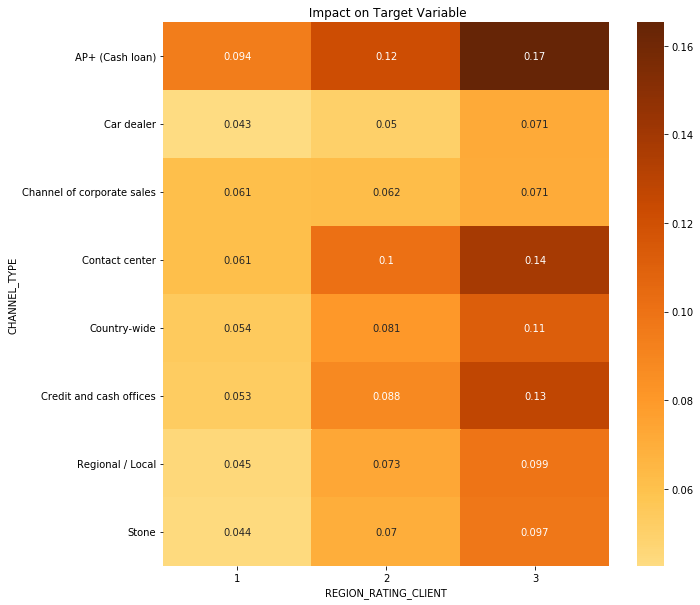

In [944]:
## Channel Type and Region Rating
res = pd.pivot_table(data =total_application_data,index='CHANNEL_TYPE',columns ='REGION_RATING_CLIENT',values= 'TARGET')
fig = plt.figure(figsize=(10,10))

sns.heatmap(res, annot = True,cmap ="YlOrBr", center =0.08)

plt.title(" Impact on Target Variable")

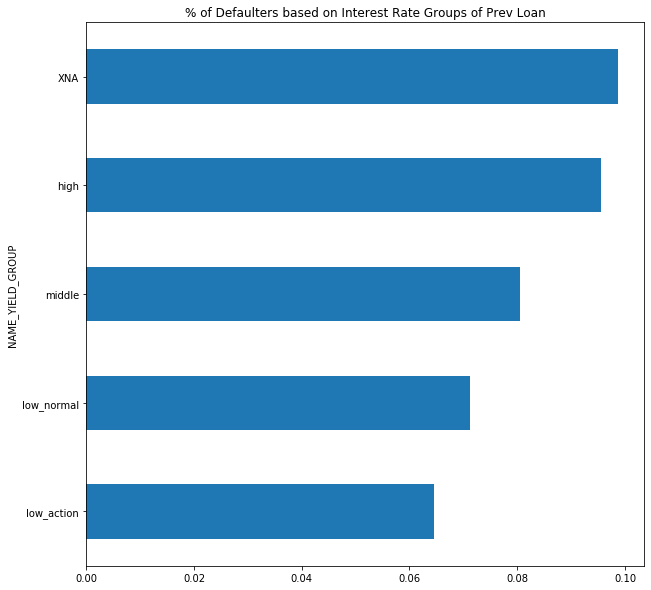

In [950]:
## Based on Purpose of previous loan
fig = plt.figure(figsize=(10,10))
total_application_data.groupby(by="NAME_YIELD_GROUP")["TARGET"].mean().sort_values().plot.barh()
plt.title('% of Defaulters based on Interest Rate Groups of Prev Loan')
plt.show()

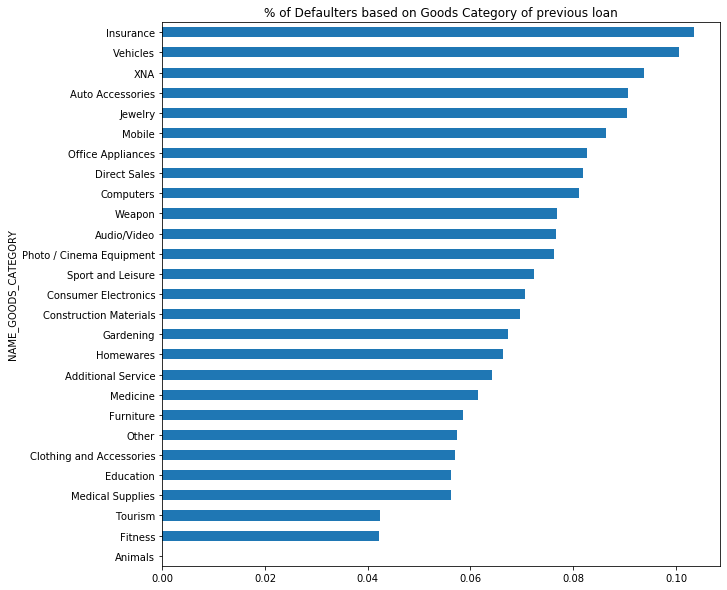

In [952]:
## Based on Purpose of previous loan goods category
fig = plt.figure(figsize=(10,10))
total_application_data.groupby(by="NAME_GOODS_CATEGORY")["TARGET"].mean().sort_values().plot.barh()
plt.title('% of Defaulters based on Goods Category of previous loan')
plt.show()

Text(0.5, 1, ' Impact on Target Variable')

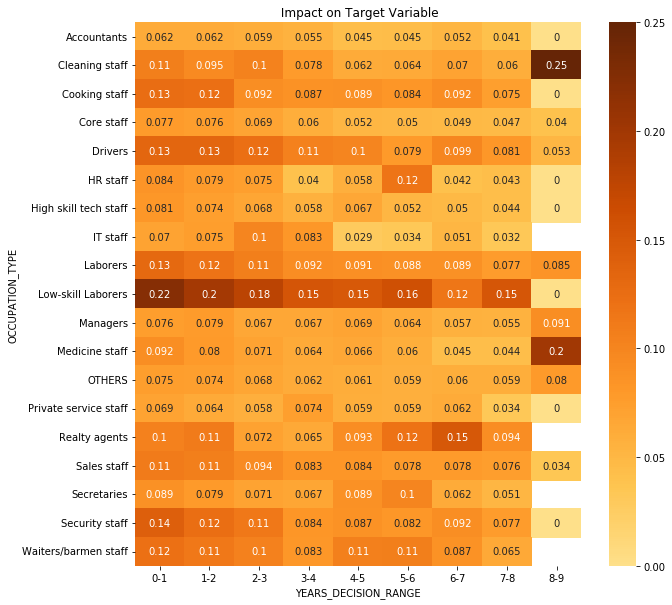

In [954]:
## YEARS_DECISION_RANGE and OCCUPATION_TYPE
res = pd.pivot_table(data =total_application_data,index='OCCUPATION_TYPE',columns ='YEARS_DECISION_RANGE',values= 'TARGET')
fig = plt.figure(figsize=(10,10))

sns.heatmap(res, annot = True,cmap ="YlOrBr", center =0.08)

plt.title(" Impact on Target Variable")

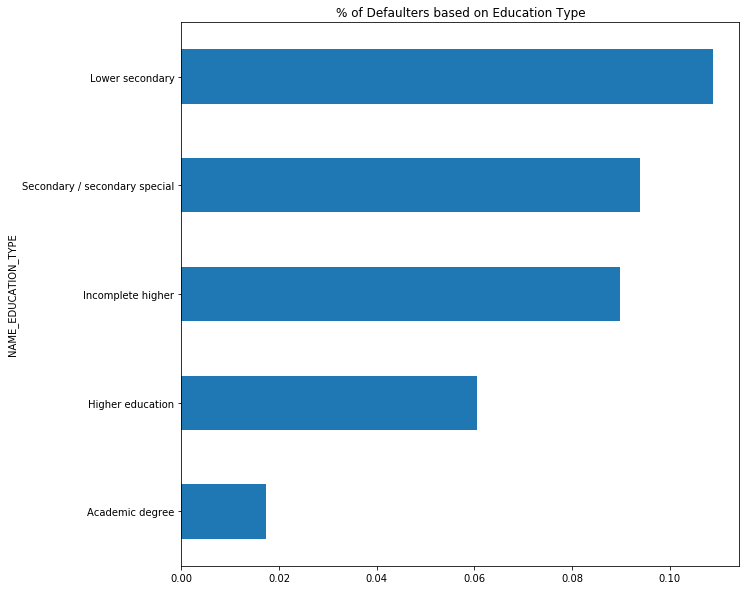

In [956]:
## Based on Education Type
fig = plt.figure(figsize=(10,10))
total_application_data.groupby(by="NAME_EDUCATION_TYPE")["TARGET"].mean().sort_values().plot.barh()
plt.title('% of Defaulters based on Education Type')
plt.show()

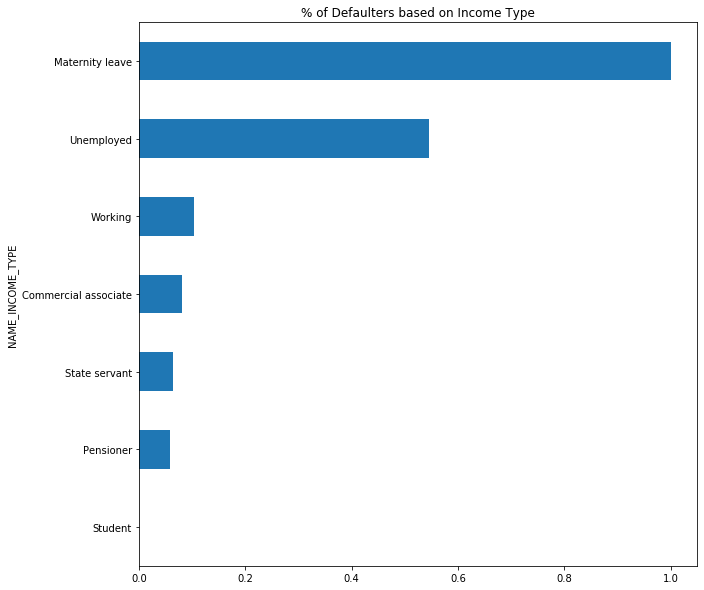

In [957]:
## Based on Income Type
fig = plt.figure(figsize=(10,10))
total_application_data.groupby(by="NAME_INCOME_TYPE")["TARGET"].mean().sort_values().plot.barh()
plt.title('% of Defaulters based on Income Type')
plt.show()

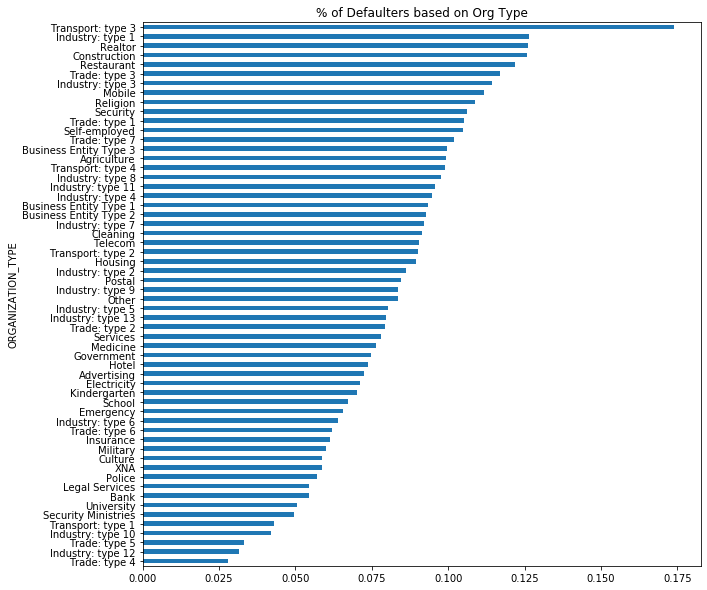

In [959]:
## Based on Income Type
fig = plt.figure(figsize=(10,10))
total_application_data.groupby(by="ORGANIZATION_TYPE")["TARGET"].mean().sort_values().plot.barh()
plt.title('% of Defaulters based on Org Type')
plt.show()

In [960]:
total_application_data.AMT_GOODS_PRICE_x.describe()

count    1.412400e+06
mean     5.277218e+05
std      3.532474e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE_x, dtype: float64

In [961]:
bins = [0,1,2,3,4,5,6,7,8,9,100]
labels = ["0-1","1-2","2-3","3-4","4-5","5-6","6-7","7-8","8-9","9 & Above"]
total_application_data['AMT_GOODS_PRICE_X_RANGE'] = pd.cut(total_application_data.AMT_GOODS_PRICE_x/1e5,bins=bins, labels =labels)

In [963]:
total_application_data.AMT_GOODS_PRICE_X_RANGE.value_counts(normalize = True)

2-3          0.203498
4-5          0.186357
9 & Above    0.130789
6-7          0.124631
1-2          0.104027
3-4          0.074281
8-9          0.067778
5-6          0.047656
0-1          0.031631
7-8          0.029352
Name: AMT_GOODS_PRICE_X_RANGE, dtype: float64

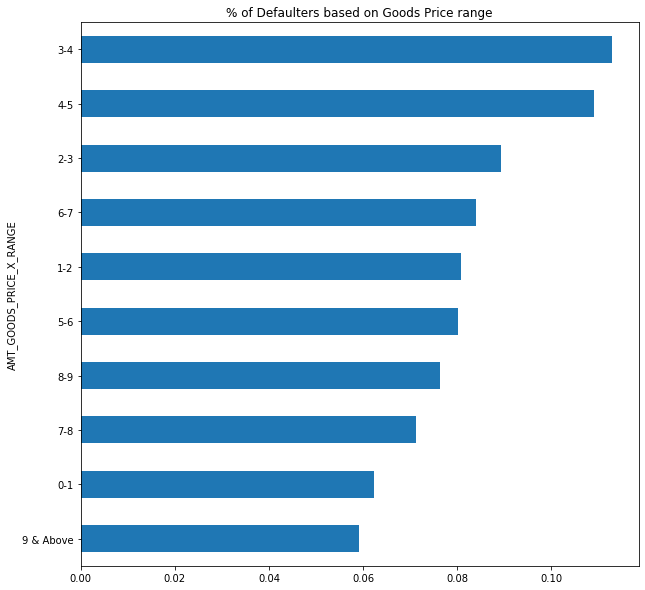

In [964]:
## Based on Amount of Goods Price
fig = plt.figure(figsize=(10,10))
total_application_data.groupby(by="AMT_GOODS_PRICE_X_RANGE")["TARGET"].mean().sort_values().plot.barh()
plt.title('% of Defaulters based on Goods Price range')
plt.show()

In [972]:
## YEARS_DECISION_RANGE and GOODS CAtegory
res = total_application_data.groupby(by="NAME_GOODS_CATEGORY")

In [973]:
res

In [977]:
res.NAME_CONTRACT_STATUS.value_counts(normalize = True)

NAME_GOODS_CATEGORY       NAME_CONTRACT_STATUS
Additional Service        Approved                0.889908
                          Refused                 0.110092
Animals                   Approved                1.000000
Audio/Video               Approved                0.899740
                          Refused                 0.090283
                          Unused offer            0.009696
                          Canceled                0.000281
Auto Accessories          Approved                0.889513
                          Refused                 0.091376
                          Unused offer            0.018789
                          Canceled                0.000321
Clothing and Accessories  Approved                0.911889
                          Refused                 0.084435
                          Unused offer            0.003676
Computers                 Approved                0.832407
                          Refused                 0.127802
         

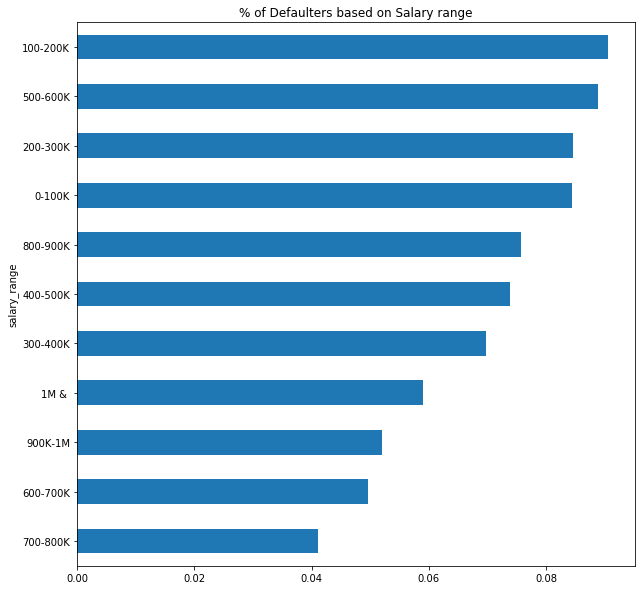

In [978]:
## By salary range
fig = plt.figure(figsize=(10,10))
total_application_data.groupby(by="salary_range")["TARGET"].mean().sort_values().plot.barh()
plt.title('% of Defaulters based on Salary range')
plt.show()

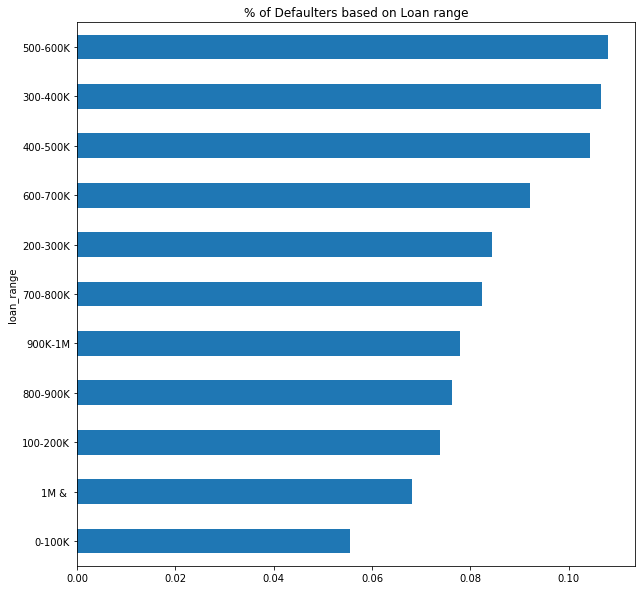

In [980]:
## By loan range
fig = plt.figure(figsize=(10,10))
total_application_data.groupby(by="loan_range")["TARGET"].mean().sort_values().plot.barh()
plt.title('% of Defaulters based on Loan range')
plt.show()